# House Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


```
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
```

In [1]:
# importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
# settings pandas dataframe to show every row and column
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [3]:
# Reading the dataset
df = pd.read_csv("./train.csv")

In [4]:
# checking how the dataset looks
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# checking the shape of the dataset
df.shape

(1460, 81)

In [6]:
# checking the type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# MSSubClass,OverallCond,OverallQual is not a continous variable according to our data dictionary
df['MSSubClass'] = df['MSSubClass'].astype("object")
df['OverallQual'] = df['OverallQual'].astype("object")
df['OverallCond'] = df['OverallCond'].astype("object")

In [8]:
# checking for null values in dataset
df.isnull().mean() * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
# checking for duplicate rows
df.duplicated().sum()

0

```
No duplicate rows found.
```

In [10]:
# checking the number of uniques values for every column
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [11]:
# checking the unique values for categorical data types
for column in df.select_dtypes("object").columns:
    print(column, '-->', df[column].unique())

MSSubClass --> [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning --> ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street --> ['Pave' 'Grvl']
Alley --> [nan 'Grvl' 'Pave']
LotShape --> ['Reg' 'IR1' 'IR2' 'IR3']
LandContour --> ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities --> ['AllPub' 'NoSeWa']
LotConfig --> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope --> ['Gtl' 'Mod' 'Sev']
Neighborhood --> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 --> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 --> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType --> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle --> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual --> [7 6 8 5 9 4 10 3 1 2]
OverallCond --> [5 8 6

In [12]:
# number of columns with null values
print('Number of Columns with null values: ',len([feature for feature in df.columns if df[feature].isnull().sum() > 0]))
print('Columns with null values: ',[feature for feature in df.columns if df[feature].isnull().sum() > 0])


Number of Columns with null values:  19
Columns with null values:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


- Features with null values description 
LotFrontage: Linear feet of street connected to property

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [13]:
# removing features with more than 40% null values
df.drop([feature for feature in df.columns if df[feature].isnull().mean() * 100 >= 40],inplace=True,axis="columns")

In [14]:
# checking the null values
df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [15]:
# getting all the features with null values
for column in [feature for feature in df.columns if df[feature].isnull().sum() >= 1]:
    print(column,'->',df[column].isnull().sum(),' ,',round(df[column].isnull().mean()*100,2),"%")

LotFrontage -> 259  , 17.74 %
MasVnrType -> 8  , 0.55 %
MasVnrArea -> 8  , 0.55 %
BsmtQual -> 37  , 2.53 %
BsmtCond -> 37  , 2.53 %
BsmtExposure -> 38  , 2.6 %
BsmtFinType1 -> 37  , 2.53 %
BsmtFinType2 -> 38  , 2.6 %
Electrical -> 1  , 0.07 %
GarageType -> 81  , 5.55 %
GarageYrBlt -> 81  , 5.55 %
GarageFinish -> 81  , 5.55 %
GarageQual -> 81  , 5.55 %
GarageCond -> 81  , 5.55 %


```
We will perform mean/median/mode imputation on numerical data.
```

In [16]:
# storing the column names for numeric and categorical features in different variables for imputation 
features_with_null_values_numeric = [feature for feature in df.columns if df[feature].isnull().sum() >= 1 and (df[feature].dtype == "float" or df[feature].dtype == "int")]
features_with_null_values_categorical = [feature for feature in df.columns if df[feature].isnull().sum() >= 1 and df[feature].dtype == "object"]

In [17]:
# describing the numeric features for statistical info
df[features_with_null_values_numeric].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

```
['LotFrontage', 'MasVnrArea'] has some outliers so median will be imputed.
['GarageYrBlt'] doesn't seem to have outliers so mean can be used for imputation.
```

In [18]:
# imputing the numeric columns values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

```
['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
Cases where the house doesn't have a basement. Replacing the nan values with NA (No Basement).
```

In [19]:
# filling the null values with NA (No Basement)
basement_vars =['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'] 
df[basement_vars] = df[basement_vars].fillna("NA")

```
['GarageType','GarageFinish','GarageQual','GarageCond']
Cases where the house doesn't have a garage. Replacing the nan values with NA (No Garage).
```

In [20]:
# filling the null values with NA (No Garage)
garage_vars = ['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_vars] = df[garage_vars].fillna("NA")

In [21]:
# imputing the mode for MasVnrType and Electrical variables
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode())

In [22]:
# checking for null values
df.isnull().mean()*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

```
Handled all null values.
```

In [23]:
# removing id variables as it is redundant.
df.drop(['Id'],inplace=True,axis='columns')

## Univariate Analysis

In [24]:
# dividing variables into numerical_columns and categorical_columns
numerical_columns = list(df.select_dtypes("int").columns) + list(df.select_dtypes('float').columns)
categorical_columns = df.select_dtypes("object").columns

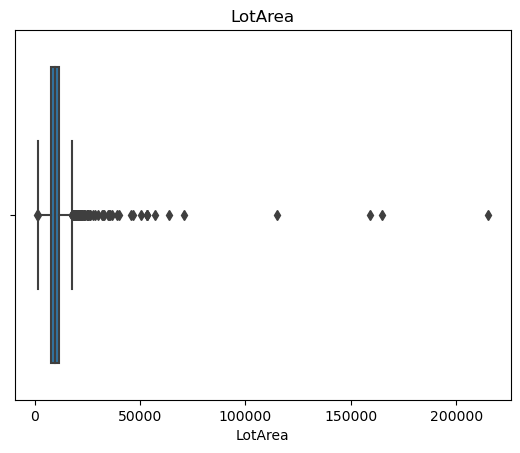

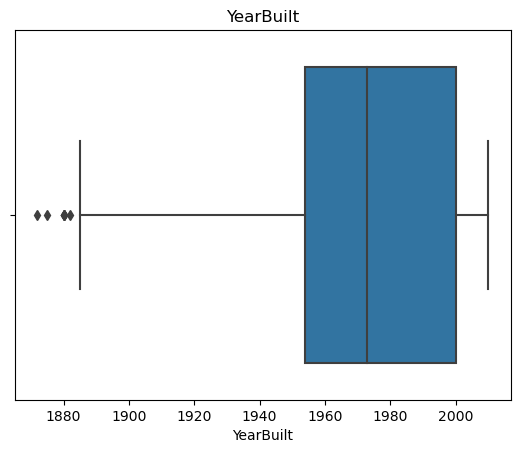

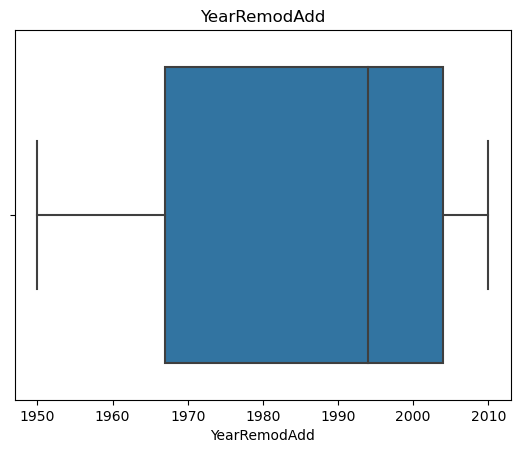

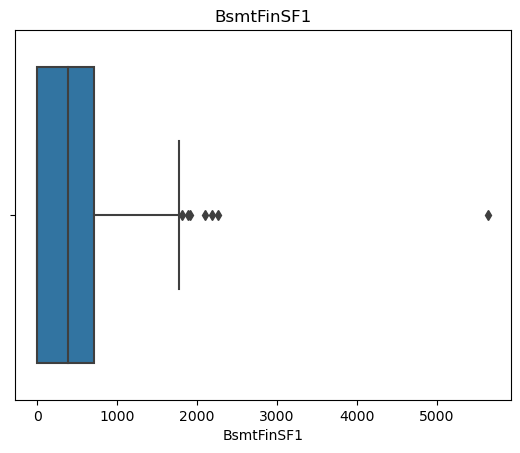

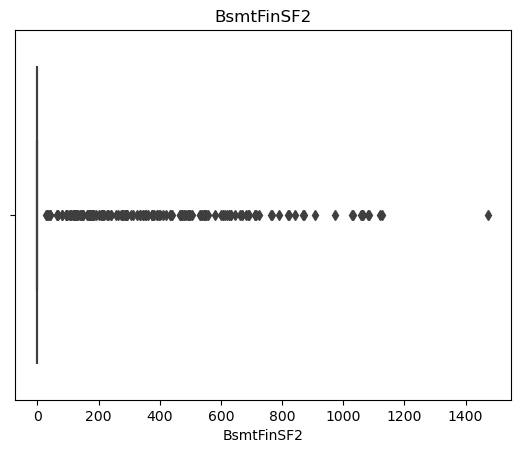

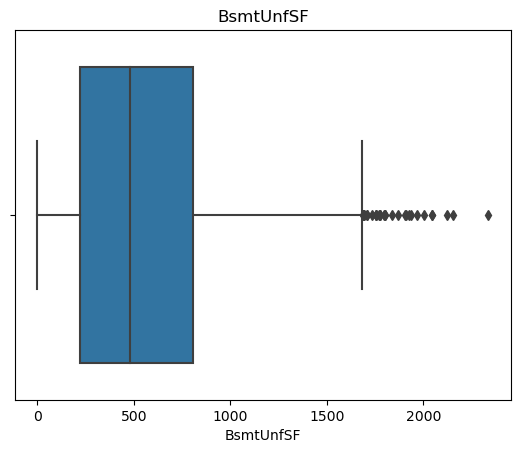

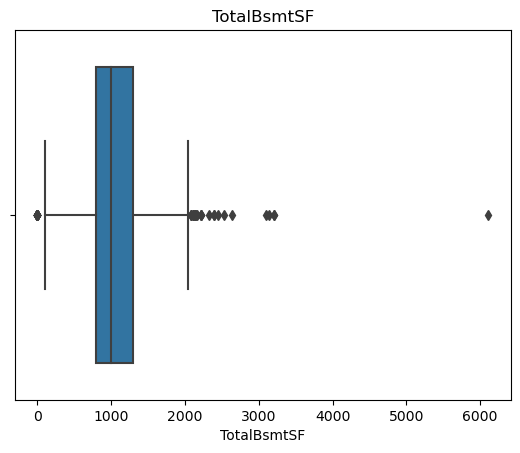

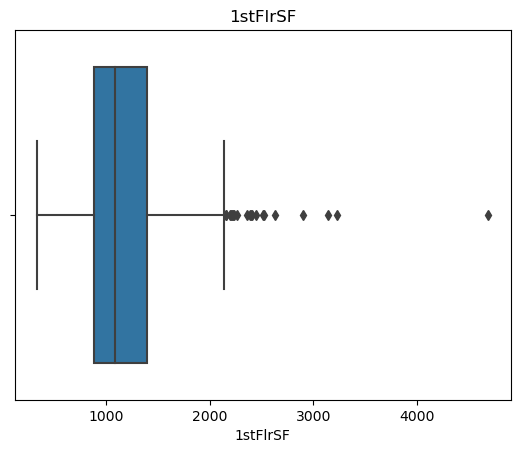

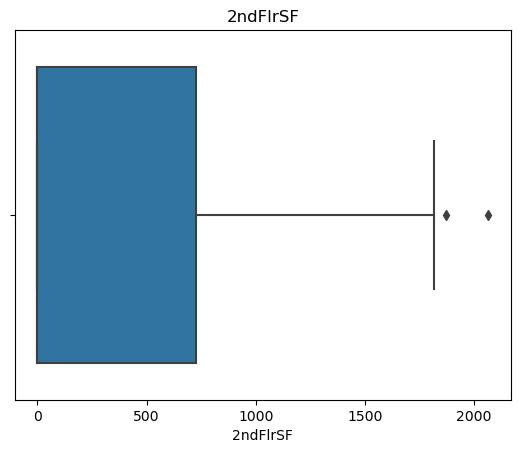

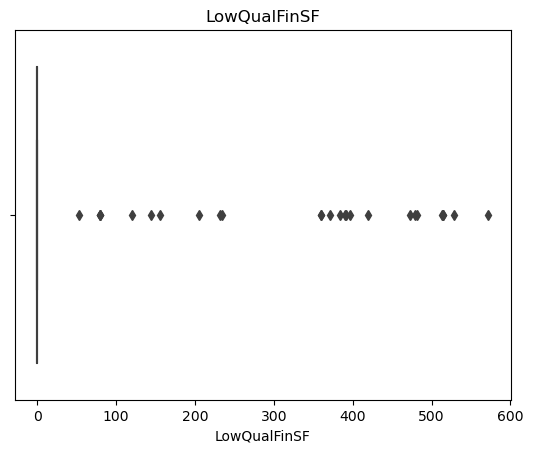

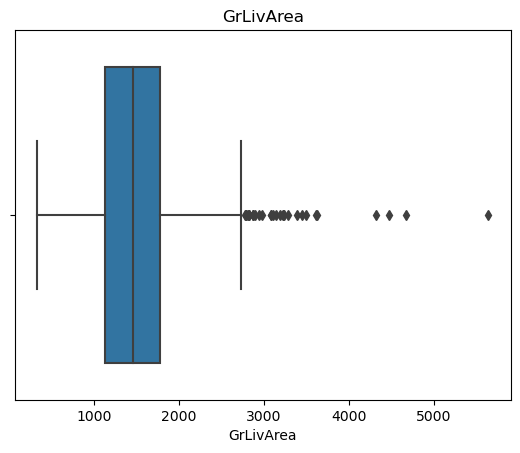

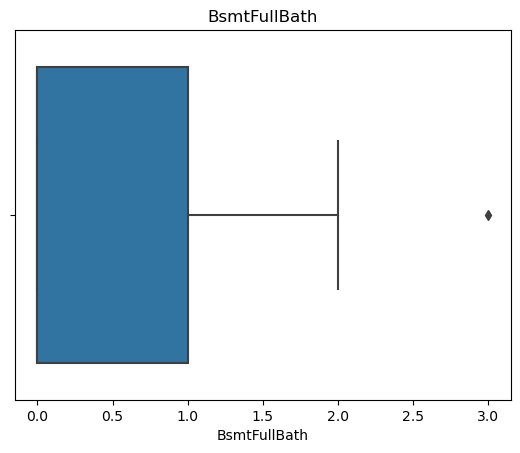

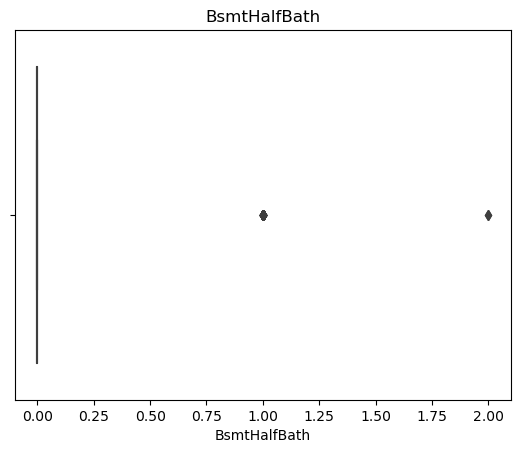

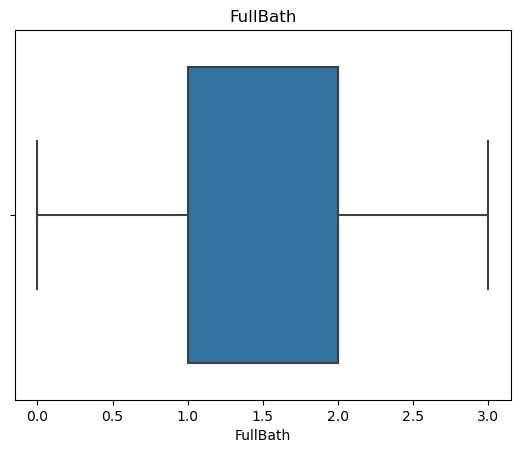

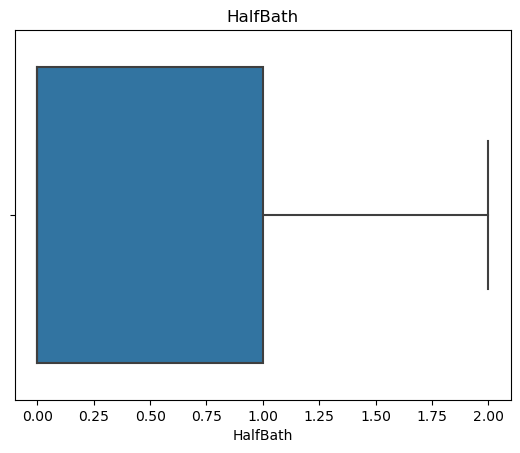

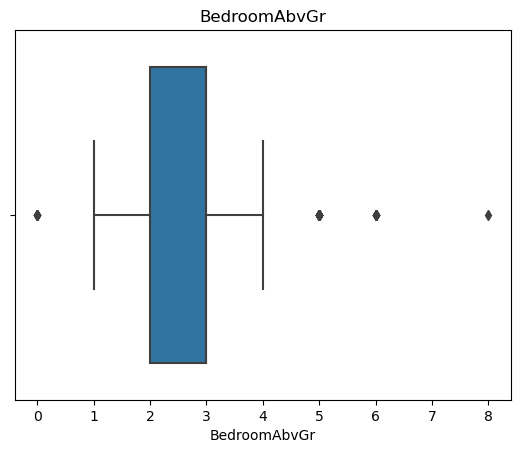

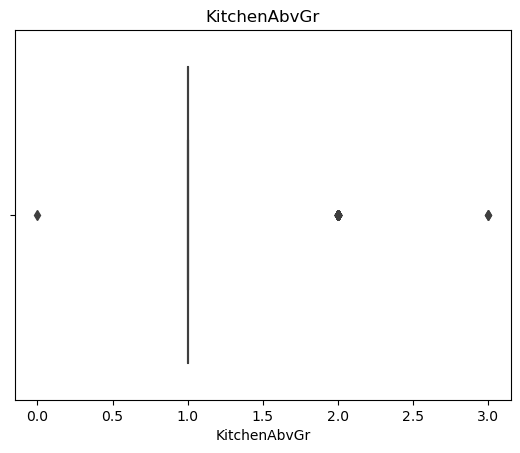

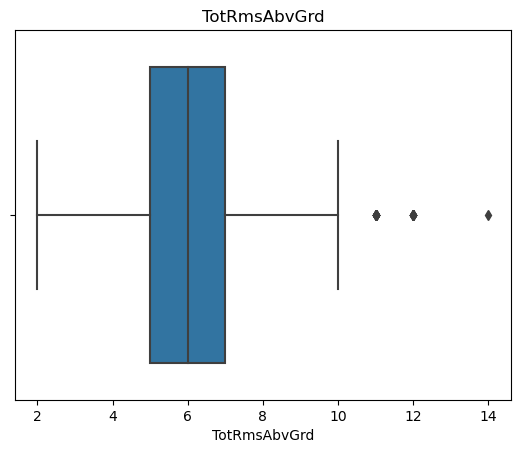

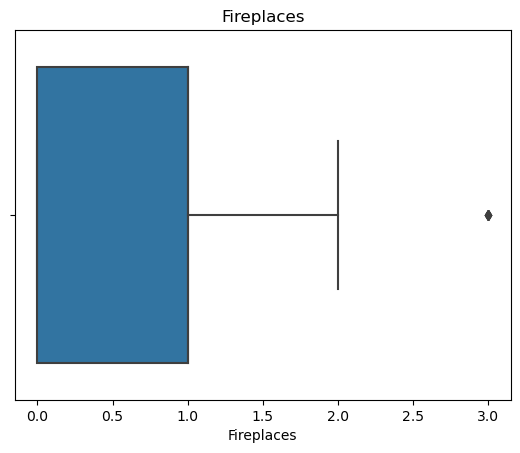

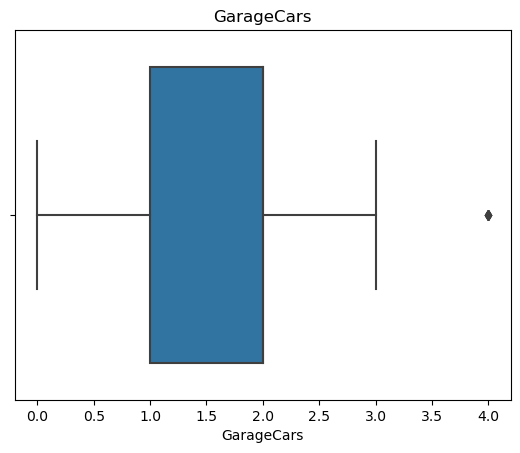

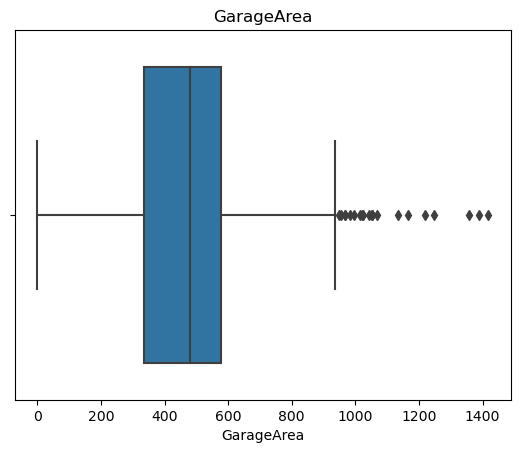

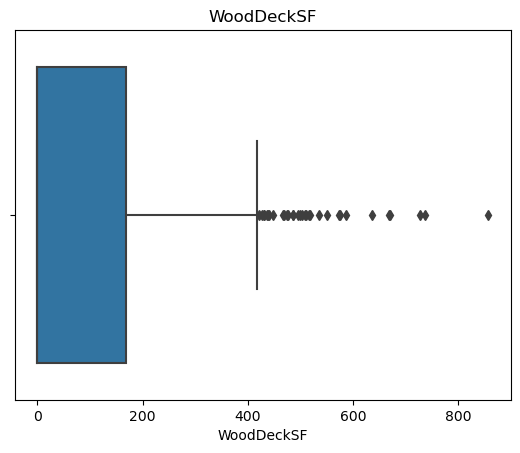

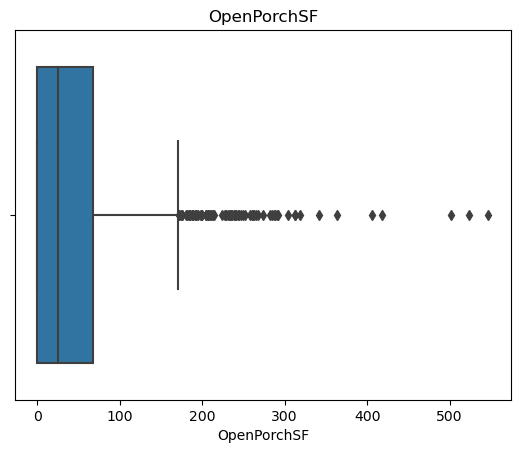

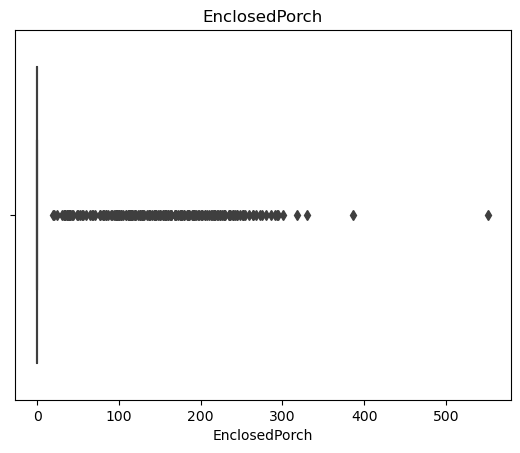

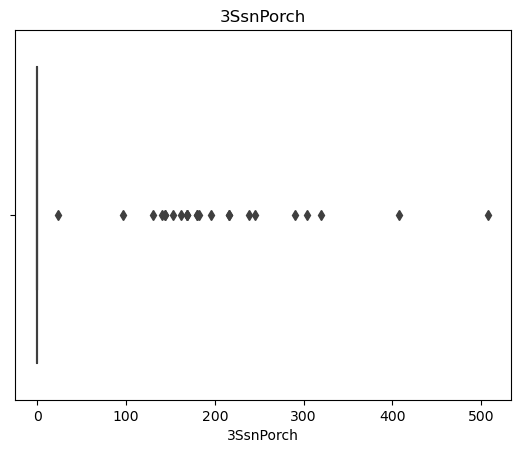

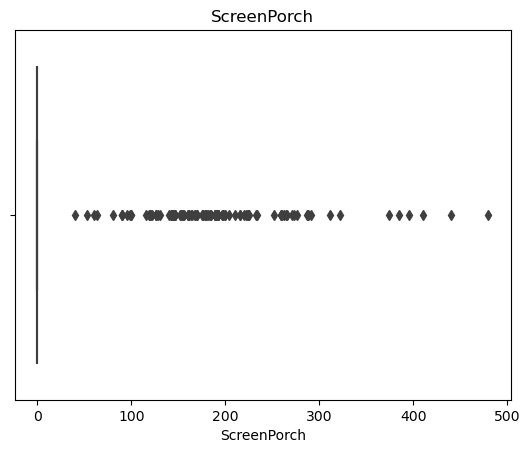

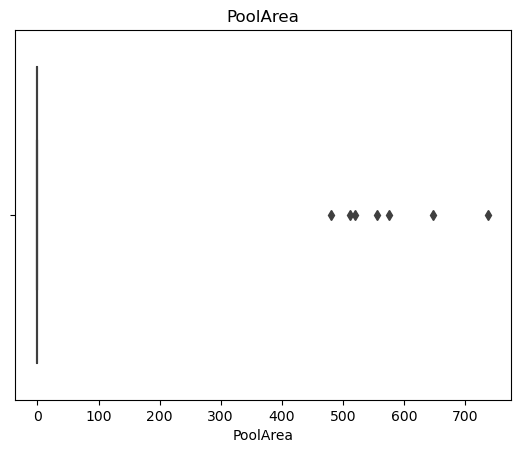

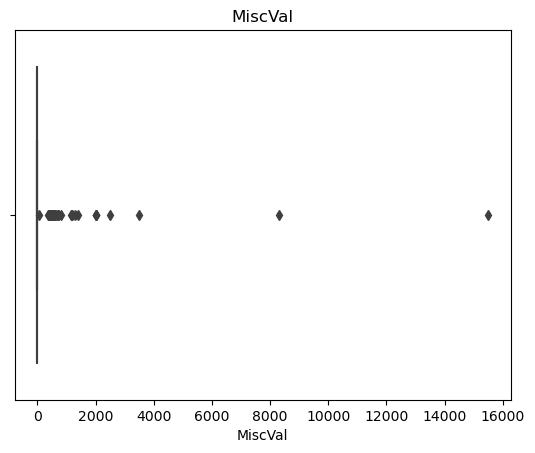

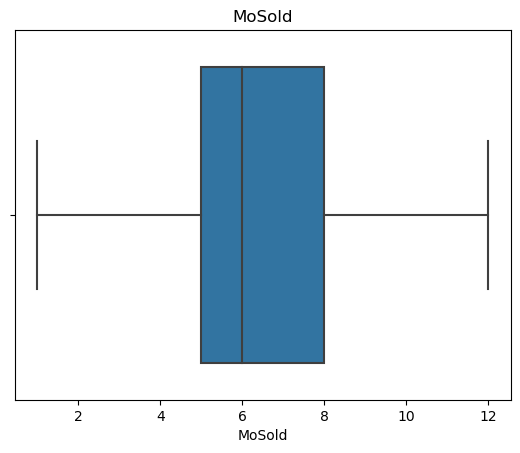

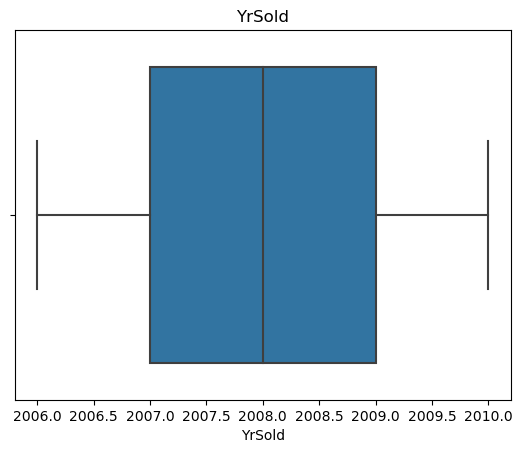

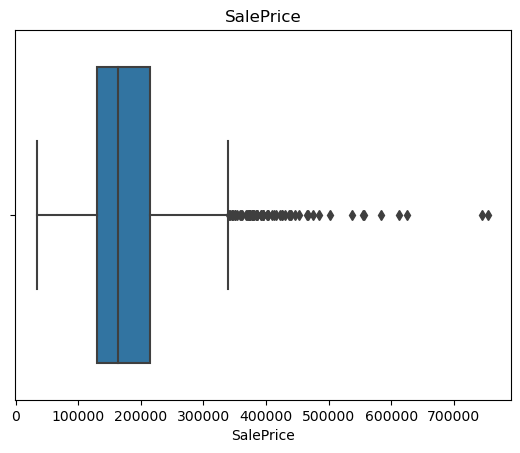

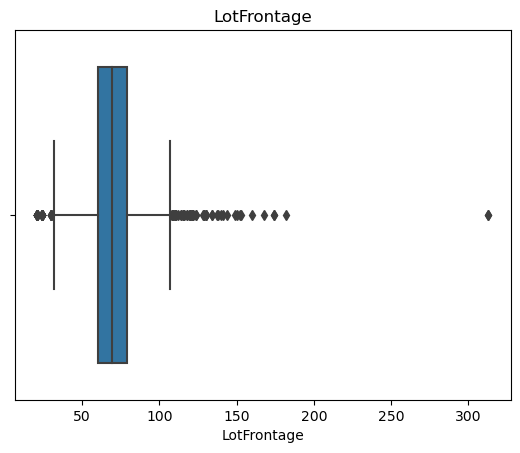

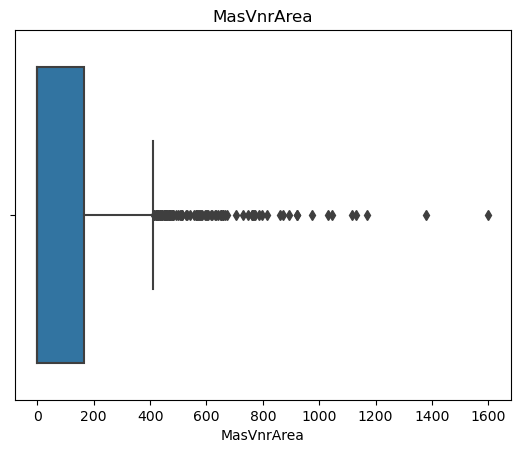

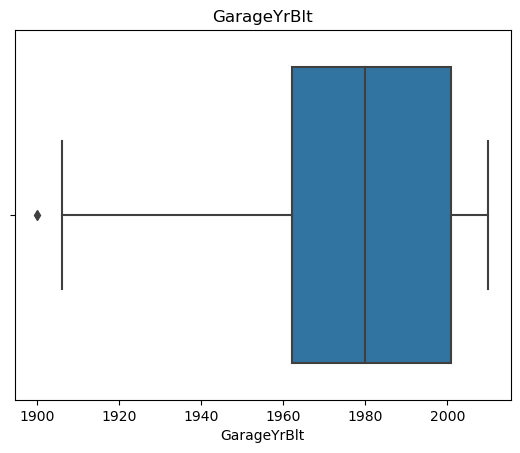

In [25]:
for feature in numerical_columns:
    sns.boxplot(data=df,x=feature)
    plt.title(feature)
    plt.show()

feature MSSubClass


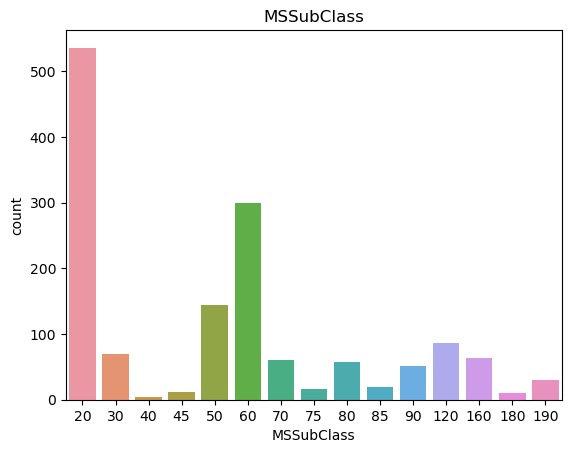

feature MSZoning


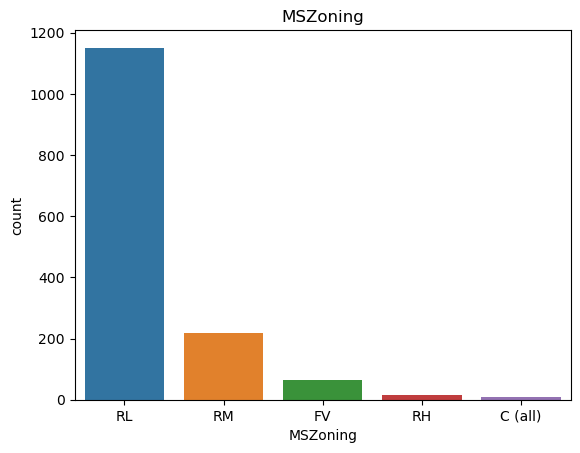

feature Street


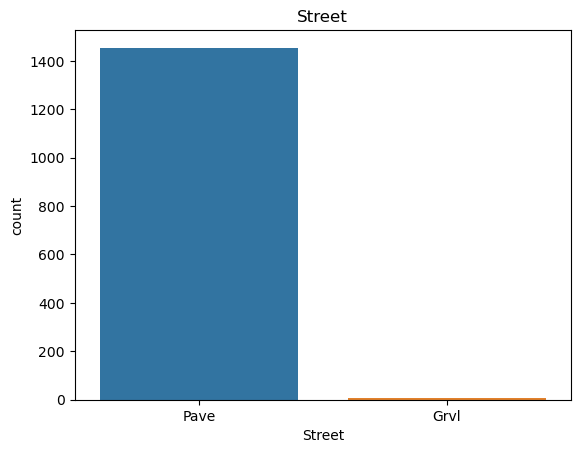

feature LotShape


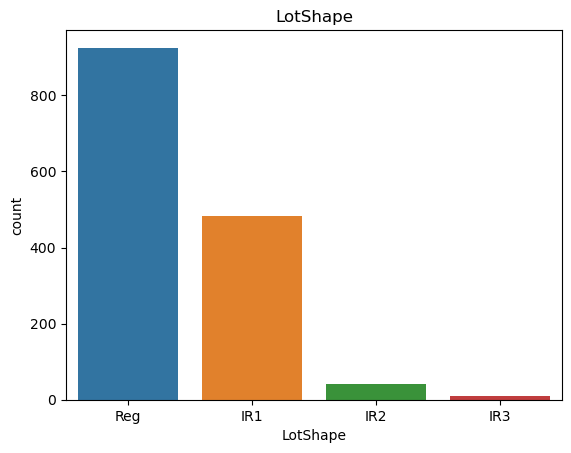

feature LandContour


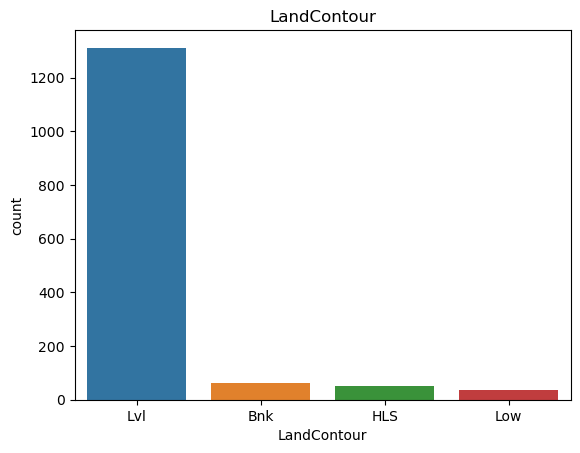

feature Utilities


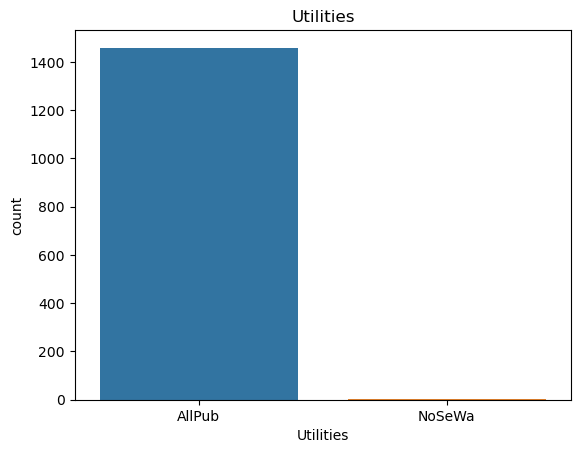

feature LotConfig


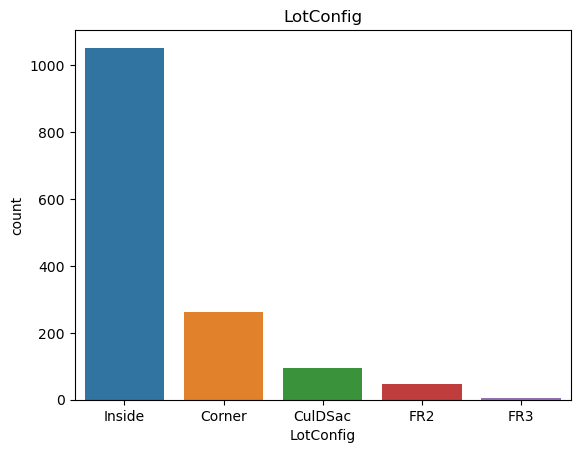

feature LandSlope


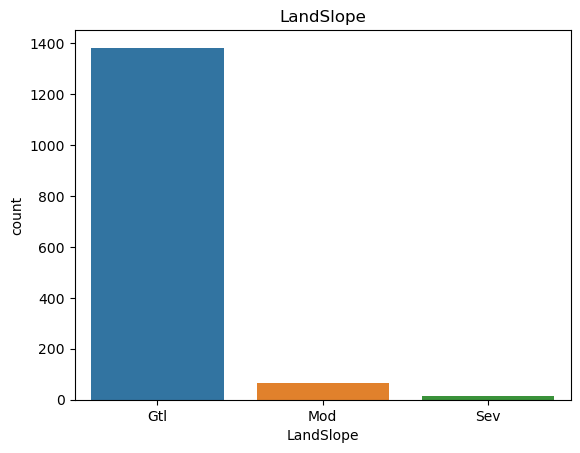

feature Neighborhood


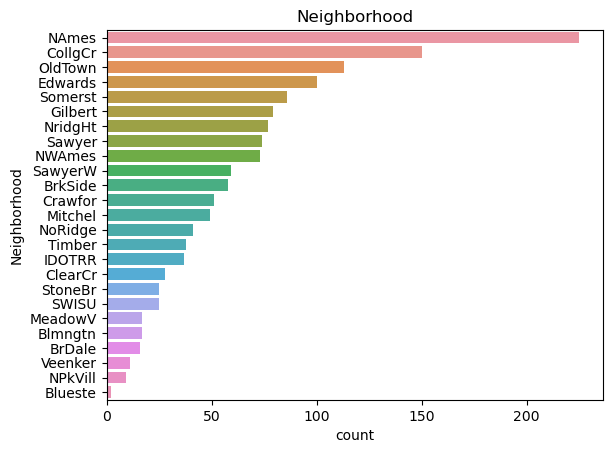

feature Condition1


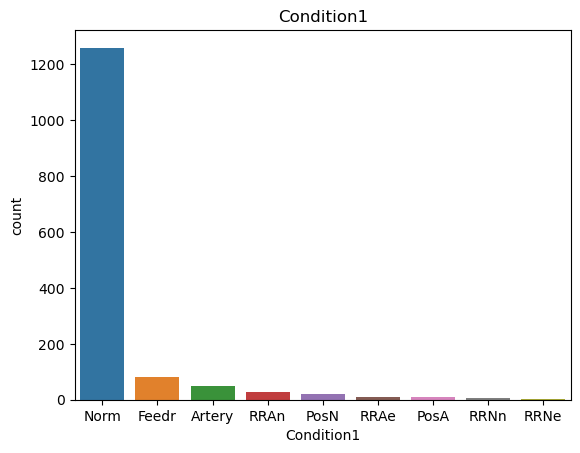

feature Condition2


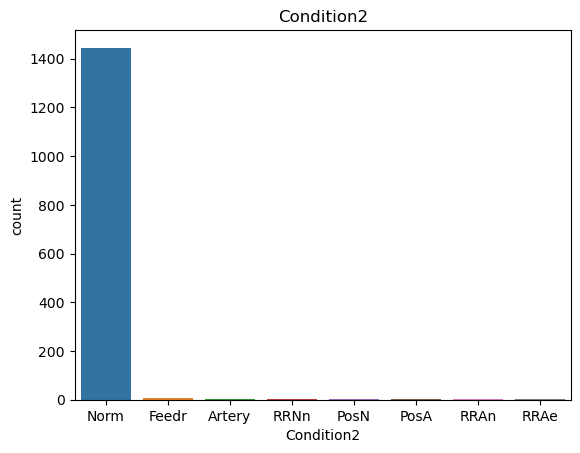

feature BldgType


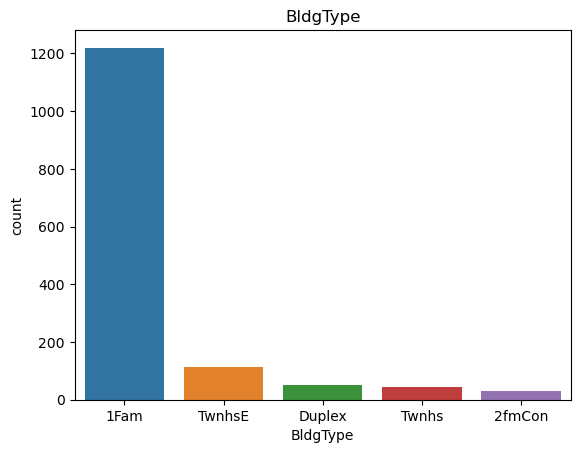

feature HouseStyle


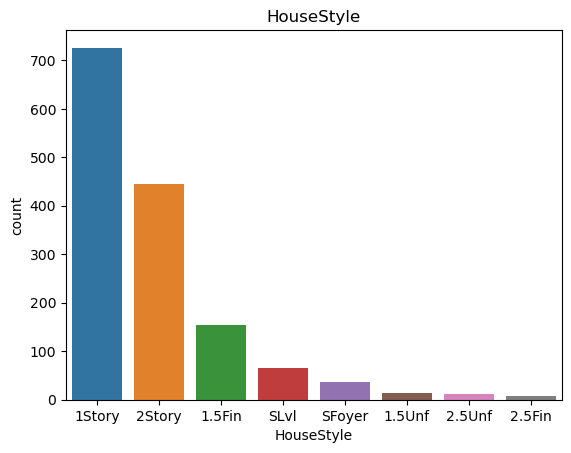

feature OverallQual


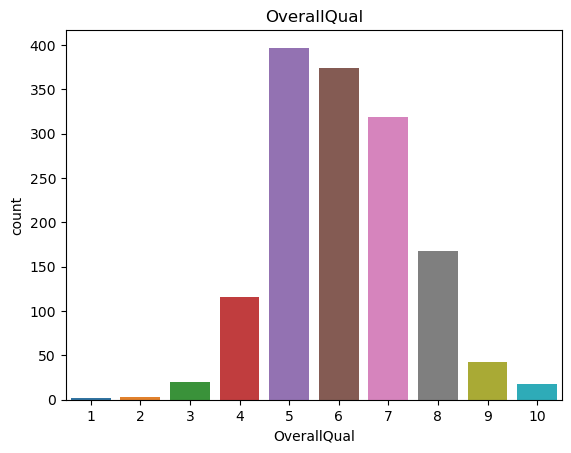

feature OverallCond


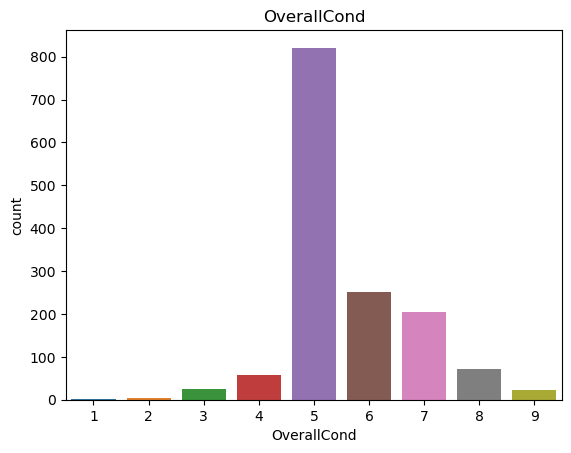

feature RoofStyle


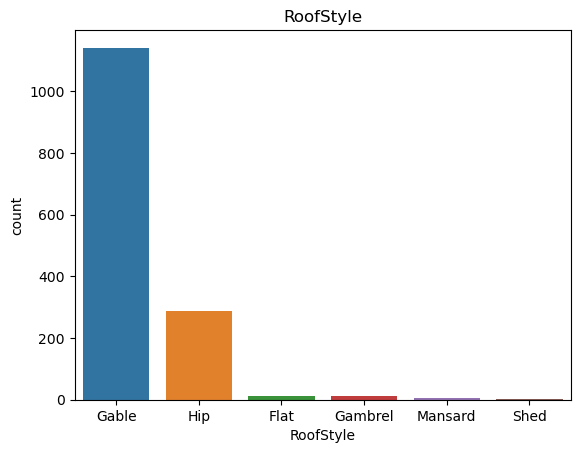

feature RoofMatl


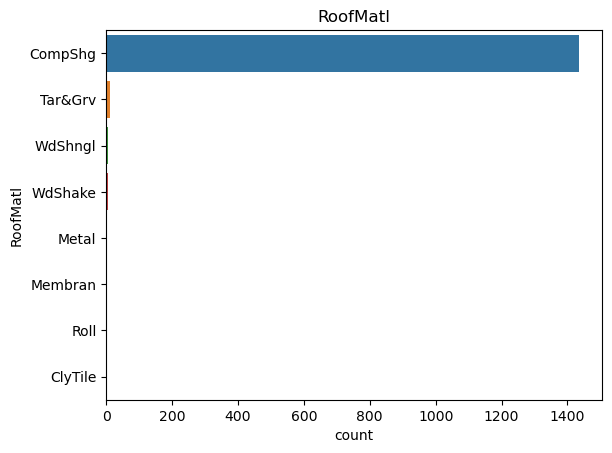

feature Exterior1st


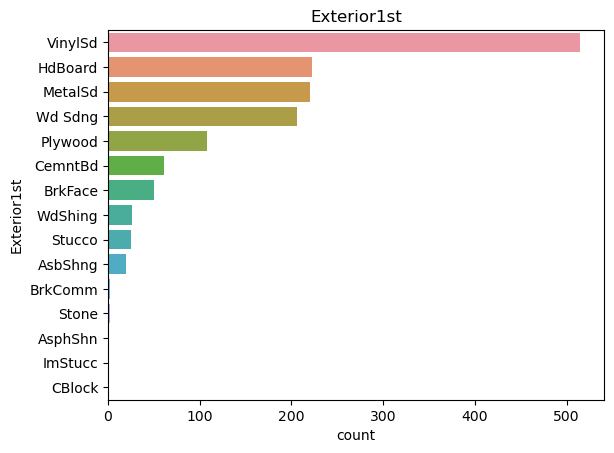

feature Exterior2nd


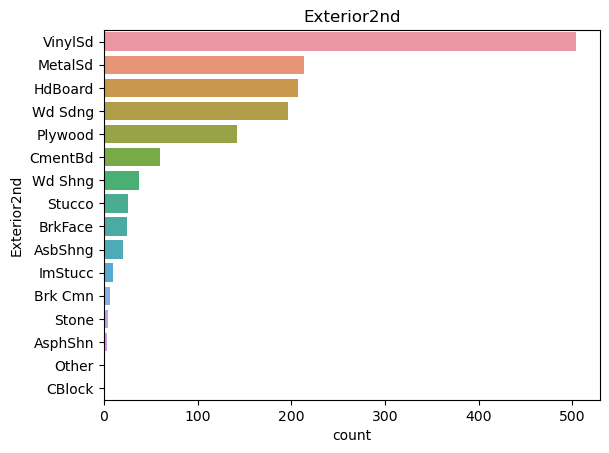

feature MasVnrType


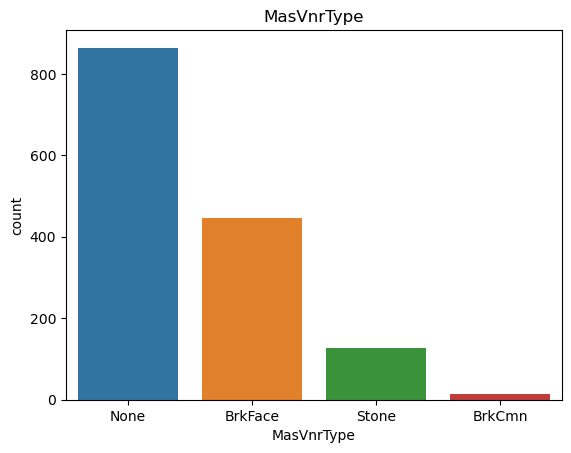

feature ExterQual


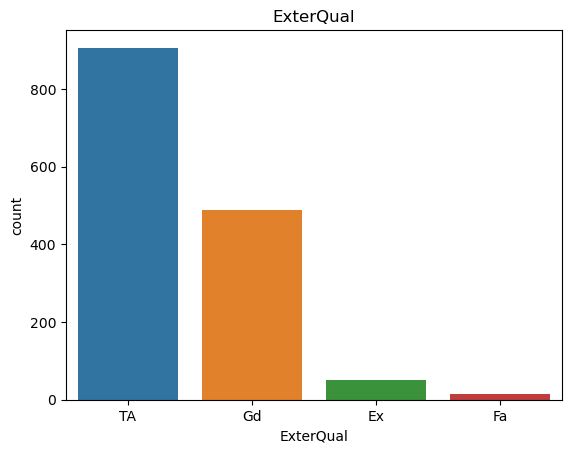

feature ExterCond


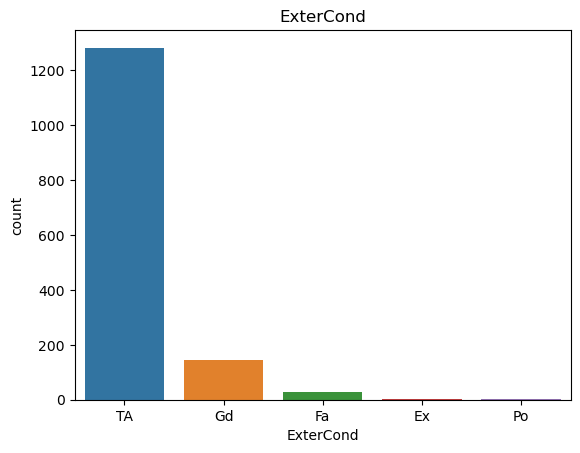

feature Foundation


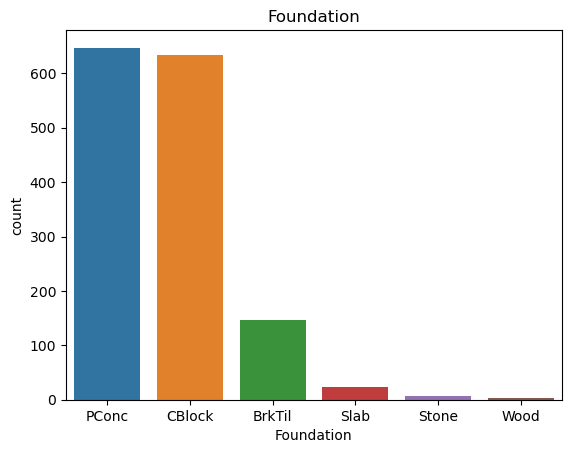

feature BsmtQual


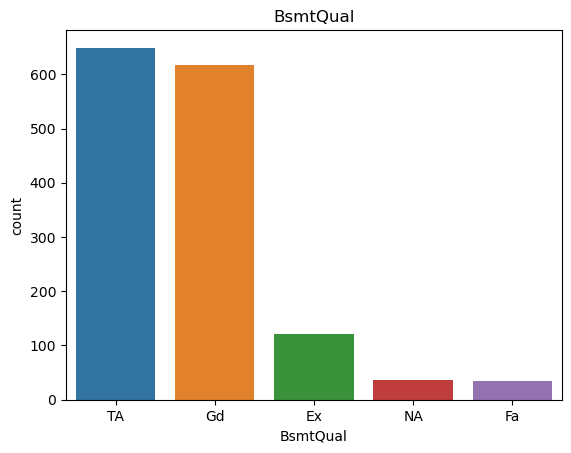

feature BsmtCond


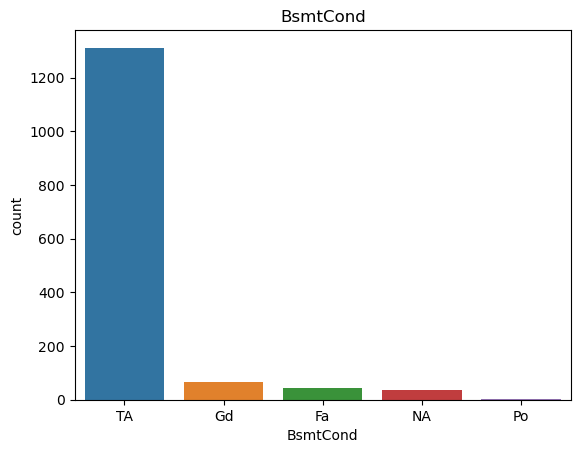

feature BsmtExposure


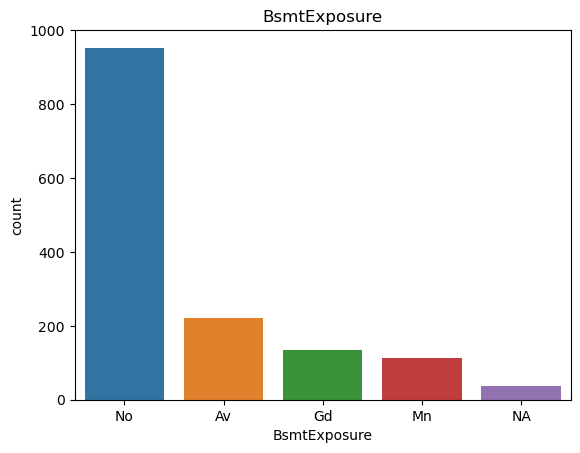

feature BsmtFinType1


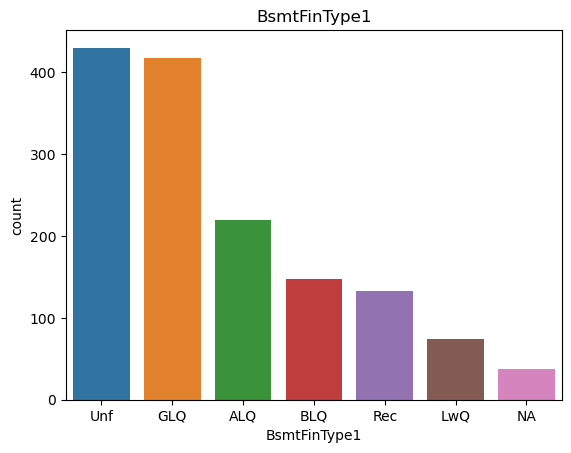

feature BsmtFinType2


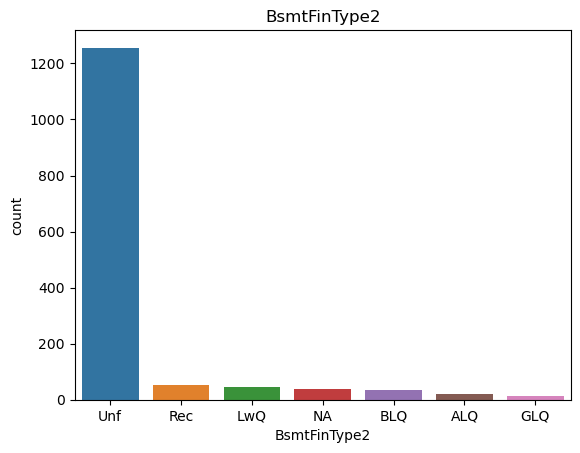

feature Heating


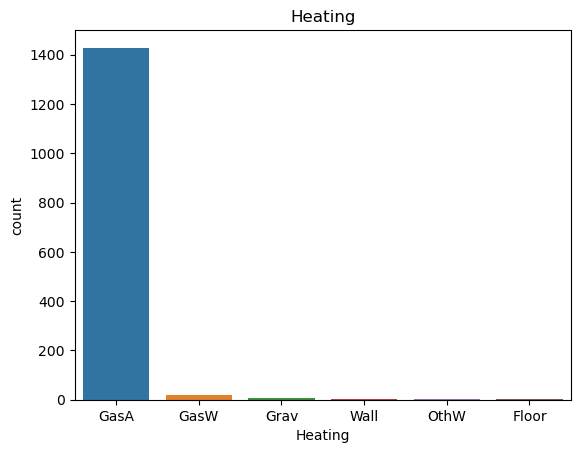

feature HeatingQC


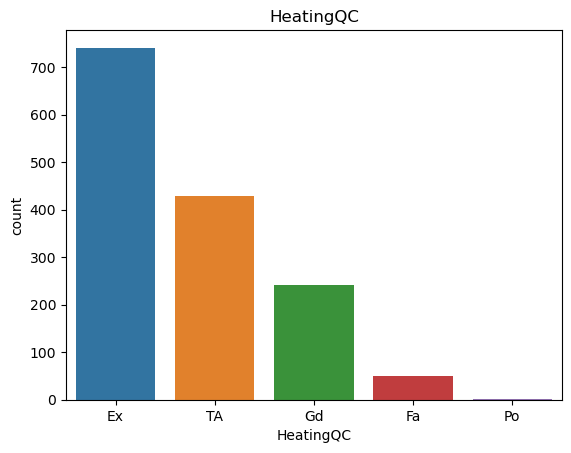

feature CentralAir


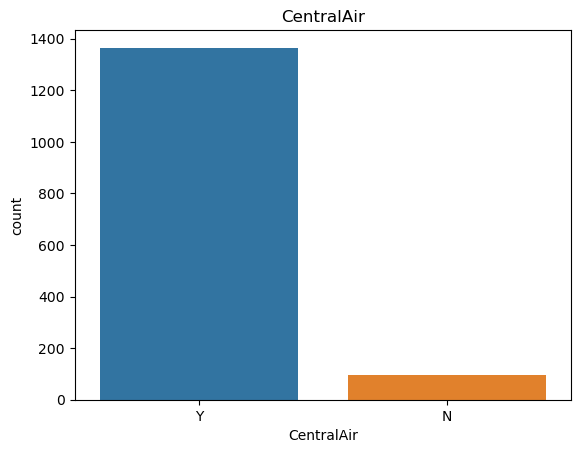

feature Electrical


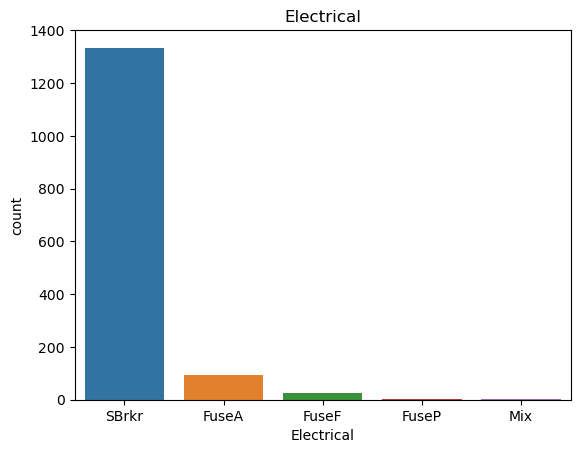

feature KitchenQual


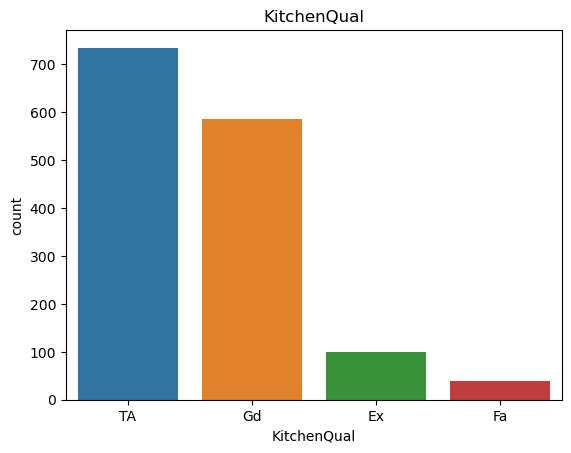

feature Functional


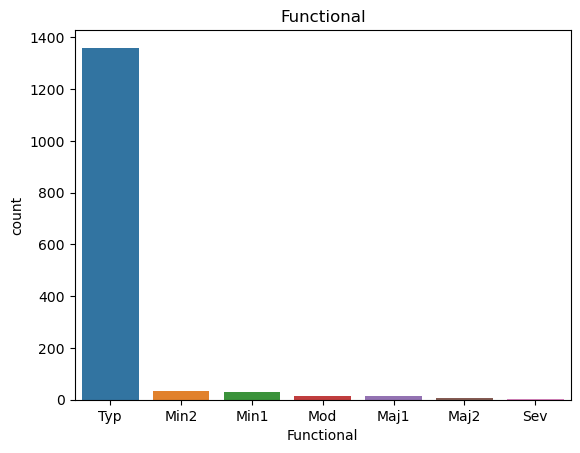

feature GarageType


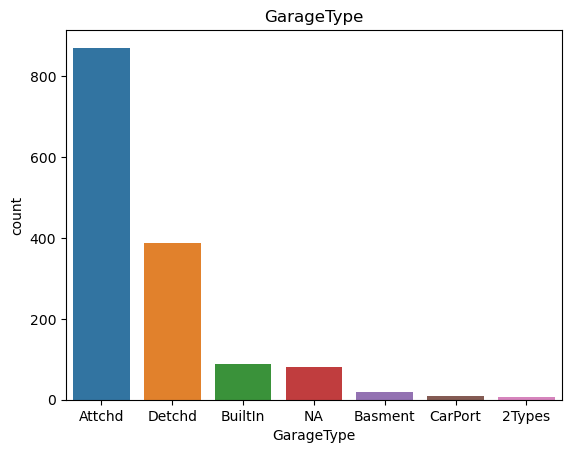

feature GarageFinish


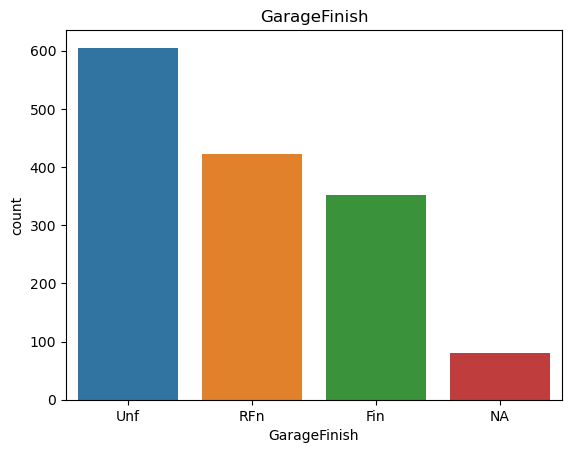

feature GarageQual


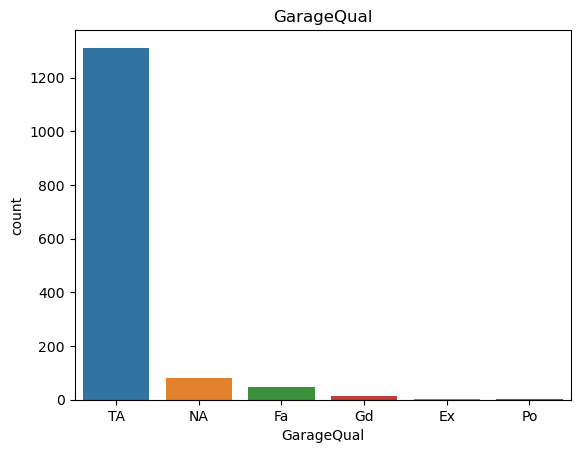

feature GarageCond


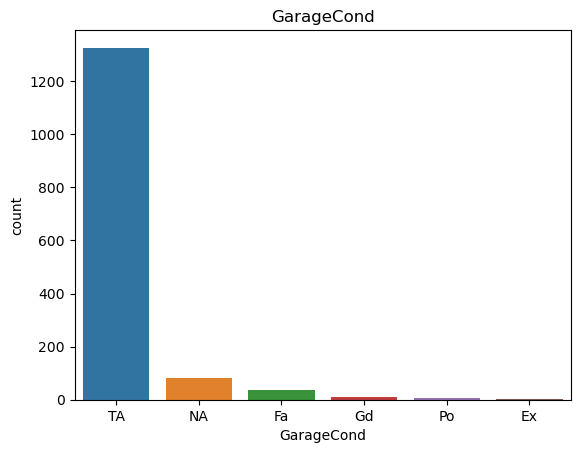

feature PavedDrive


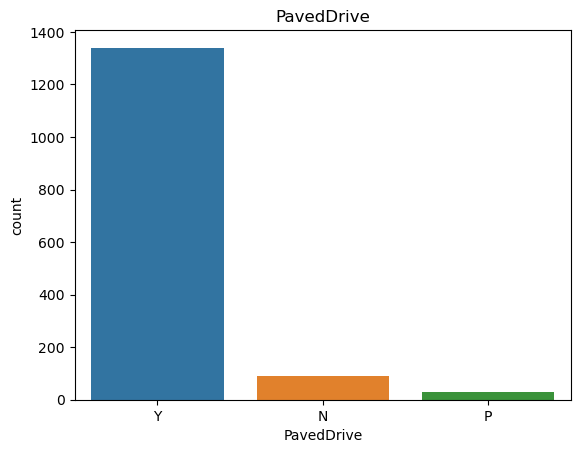

feature SaleType


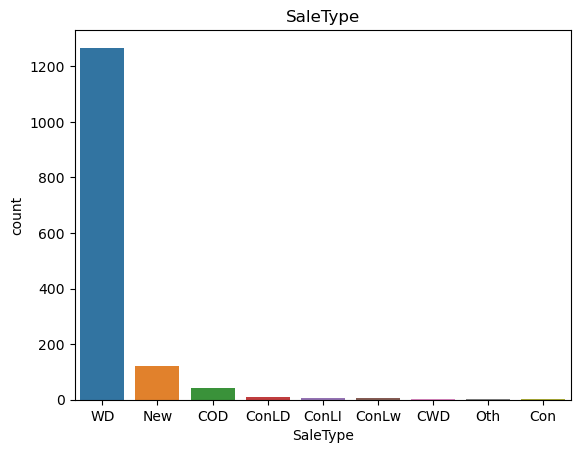

feature SaleCondition


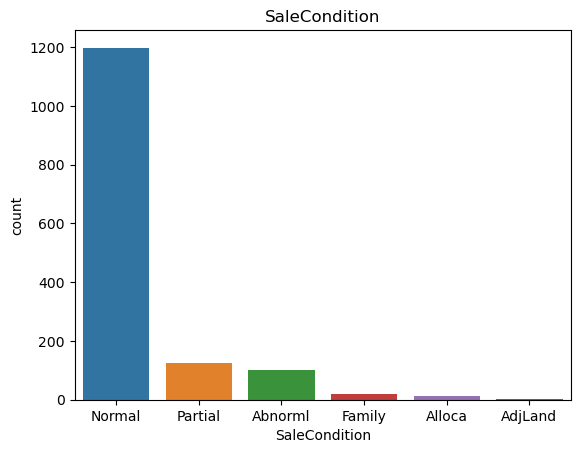

In [26]:
for feature in categorical_columns:
    print("feature",feature)
    if feature not in ["Neighborhood",'RoofMatl','Exterior1st','Exterior2nd']:
        fig = sns.barplot(x=df[feature].value_counts().index,y=df[feature].value_counts().values)
        fig.set(xlabel=feature,ylabel='count')
    else:
        fig = sns.barplot(y=df[feature].value_counts().index,x=df[feature].value_counts().values)
        fig.set(ylabel=feature,xlabel='count')
    plt.title(feature)
    plt.show()

## Bivariate Analysis

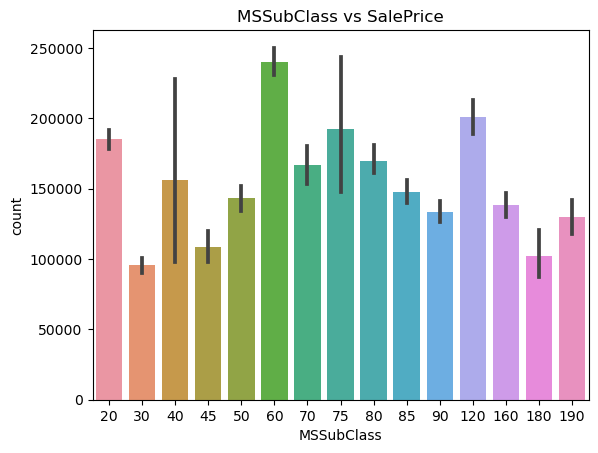

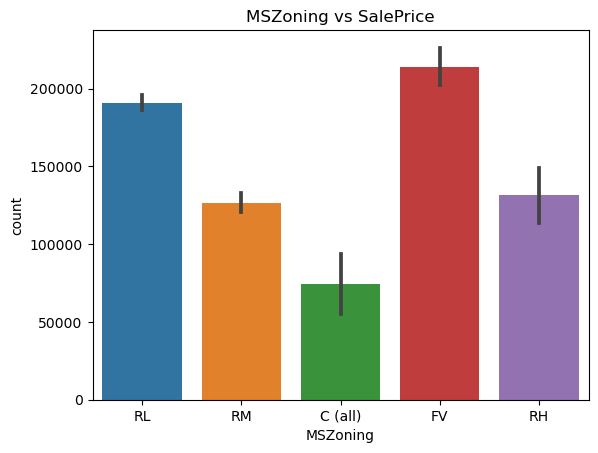

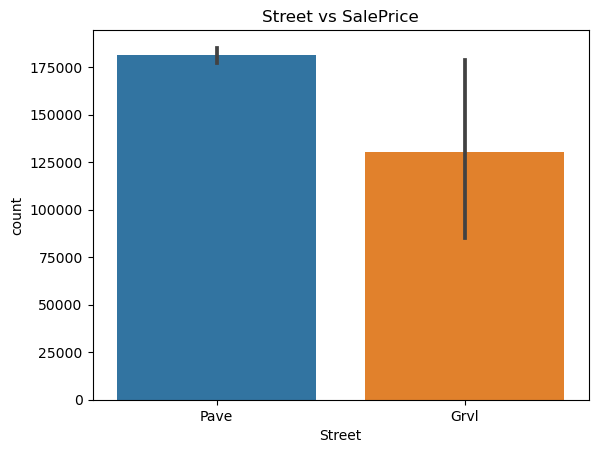

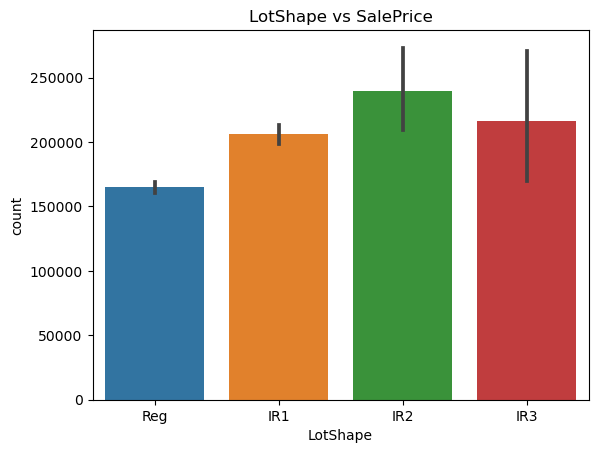

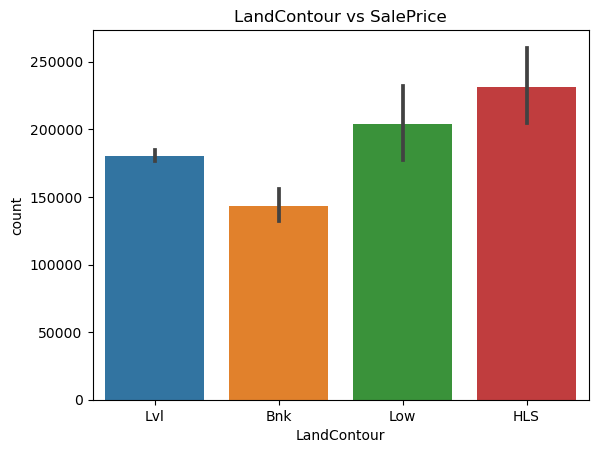

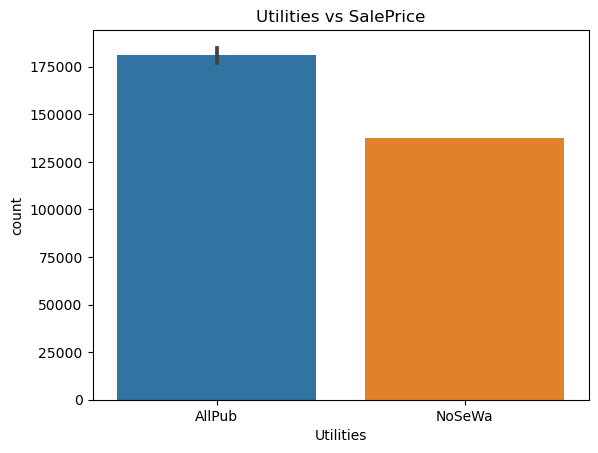

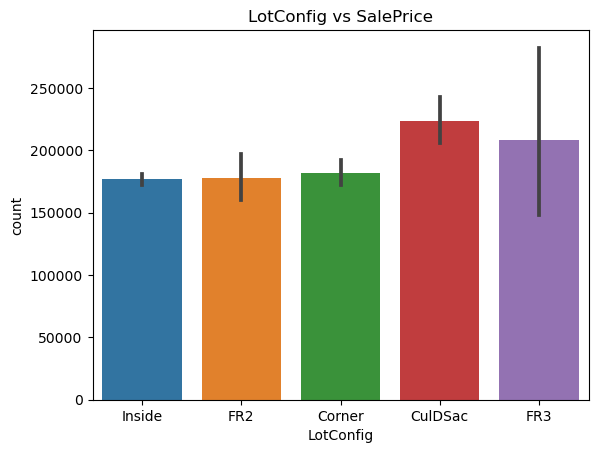

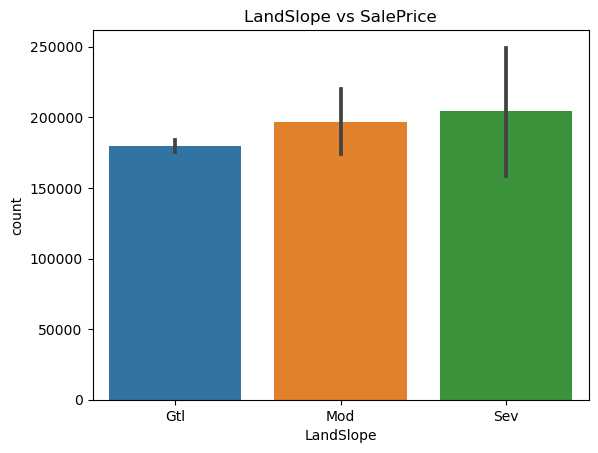

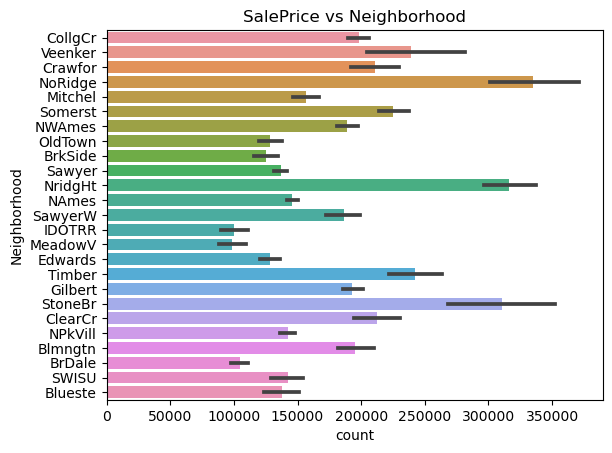

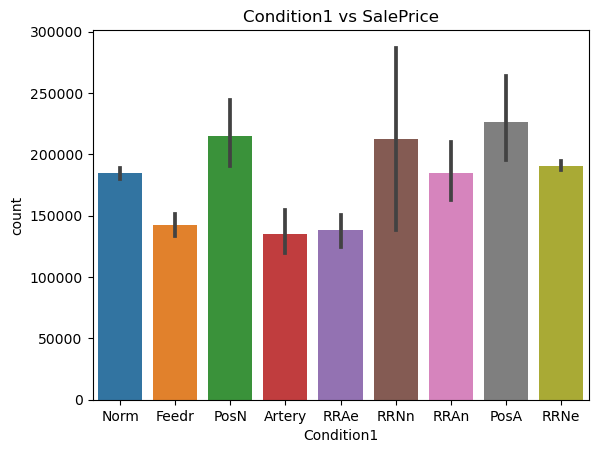

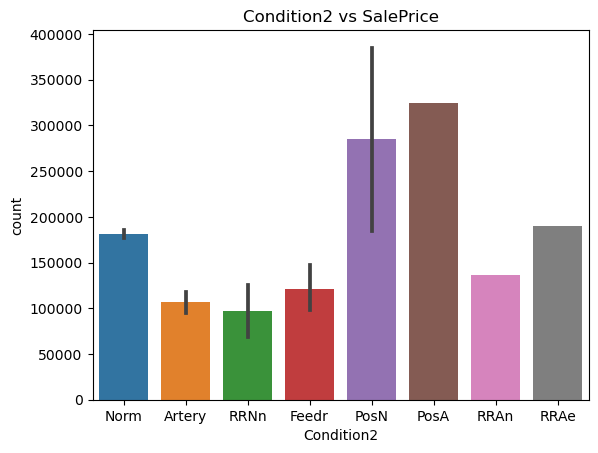

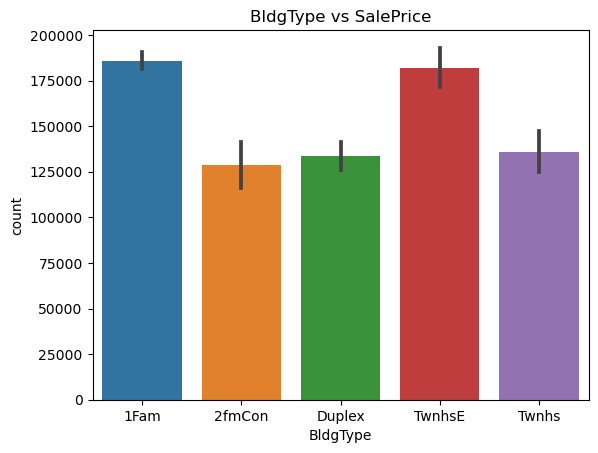

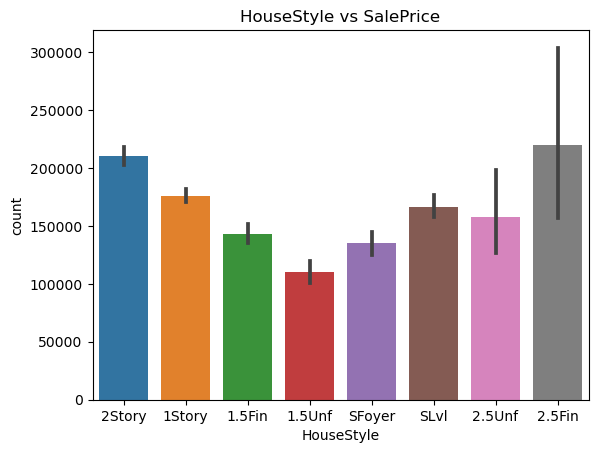

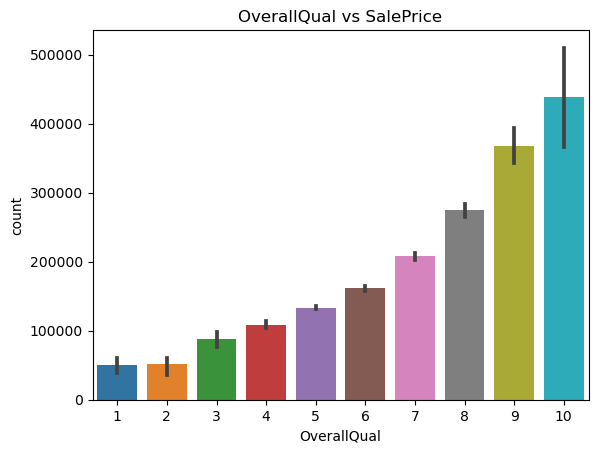

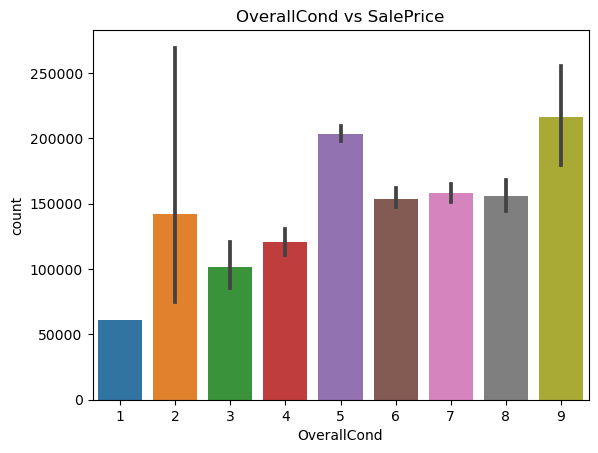

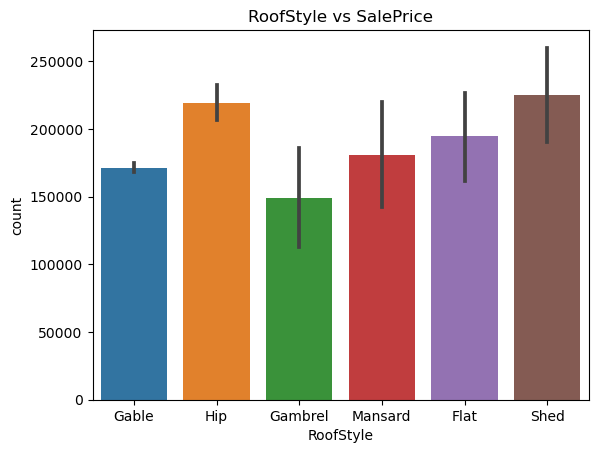

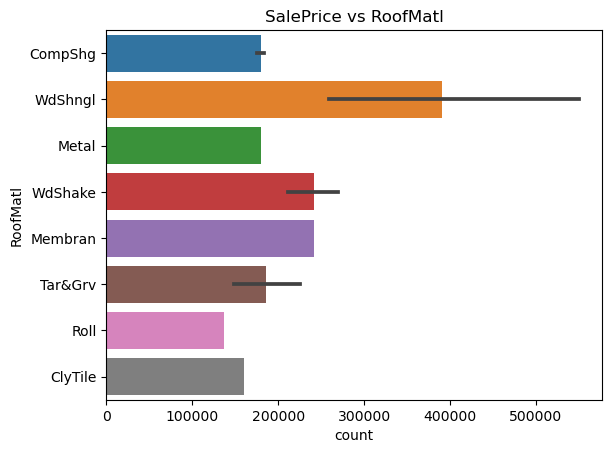

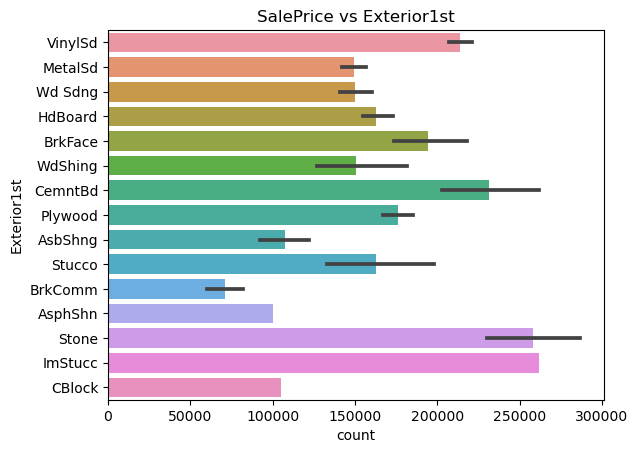

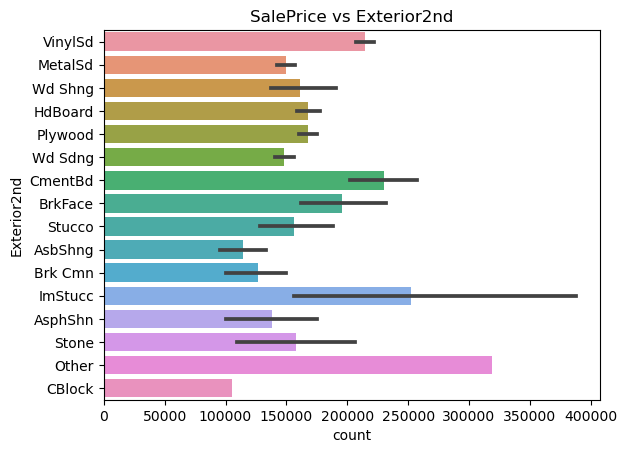

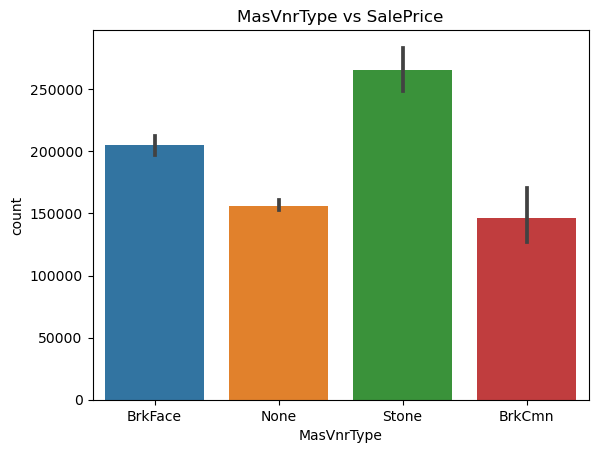

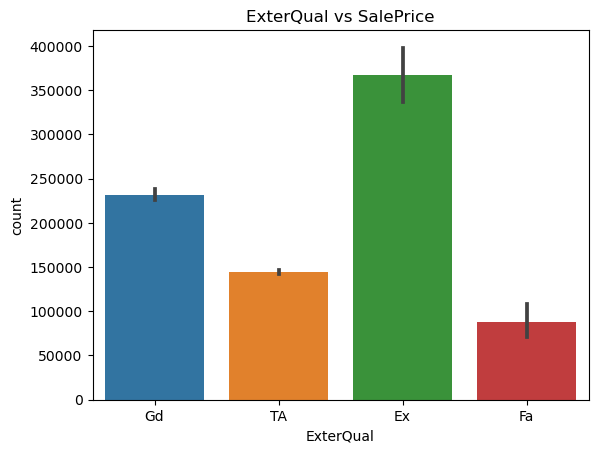

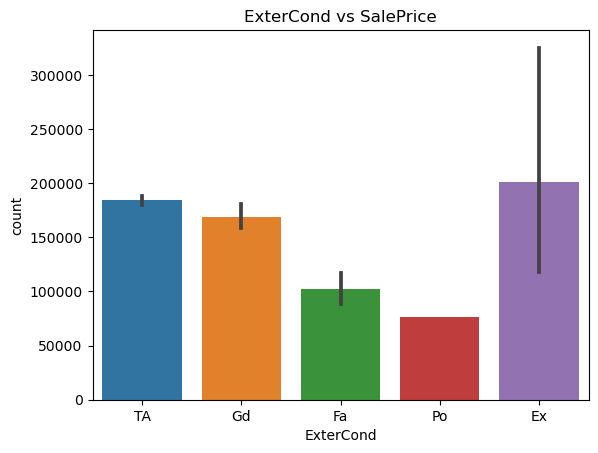

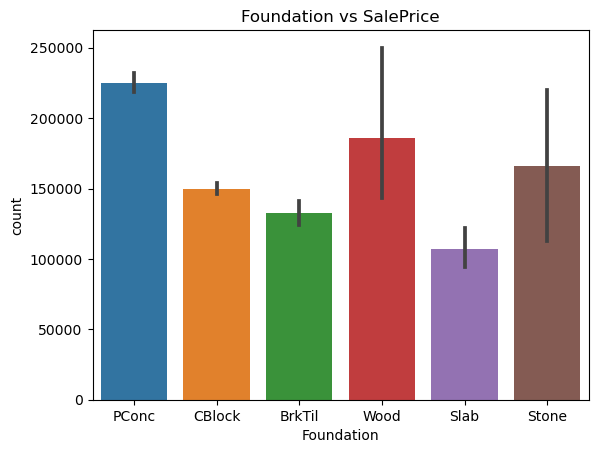

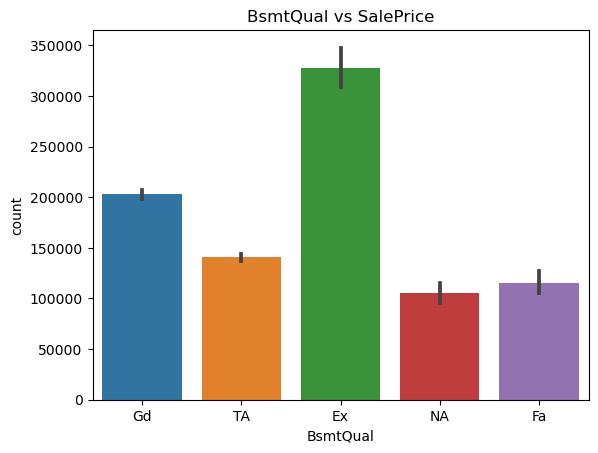

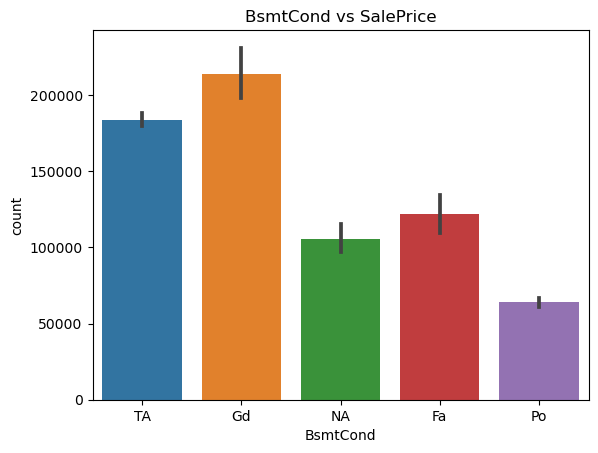

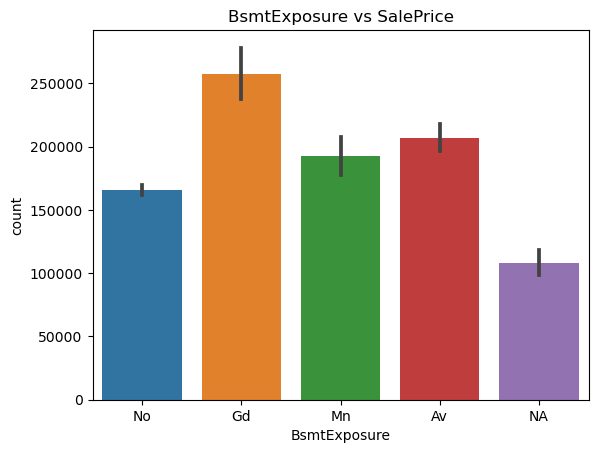

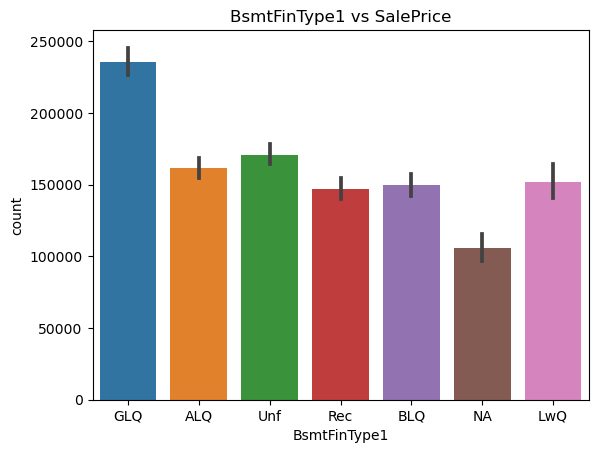

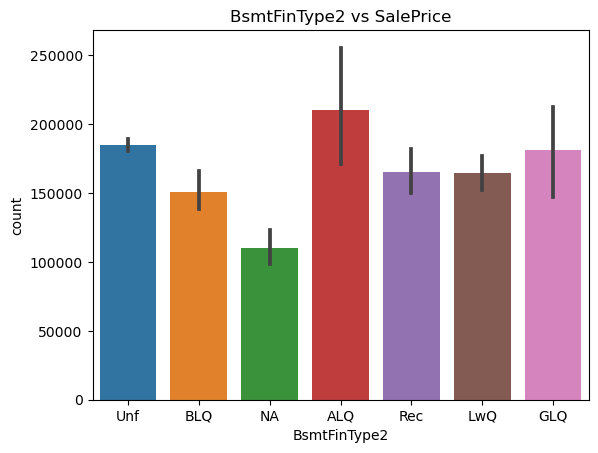

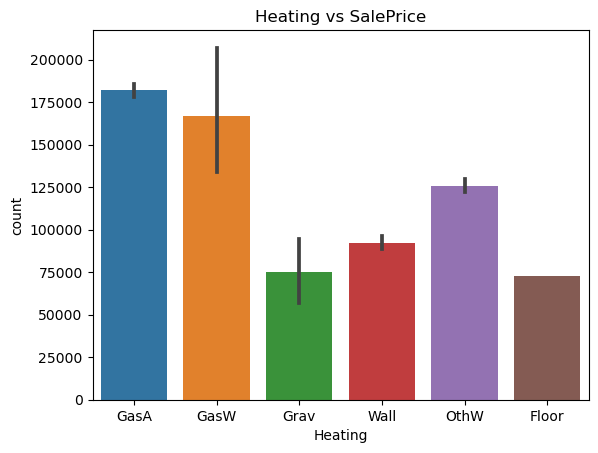

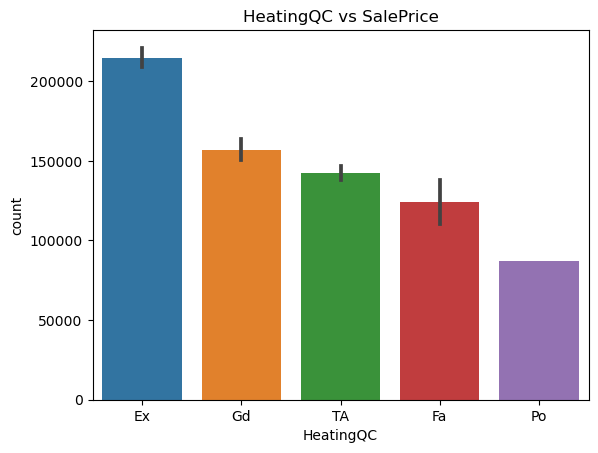

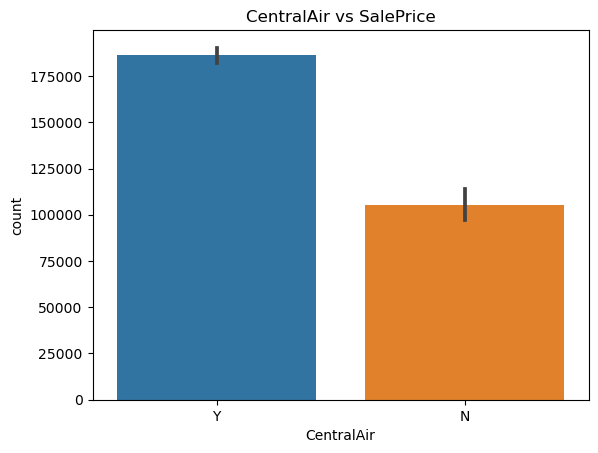

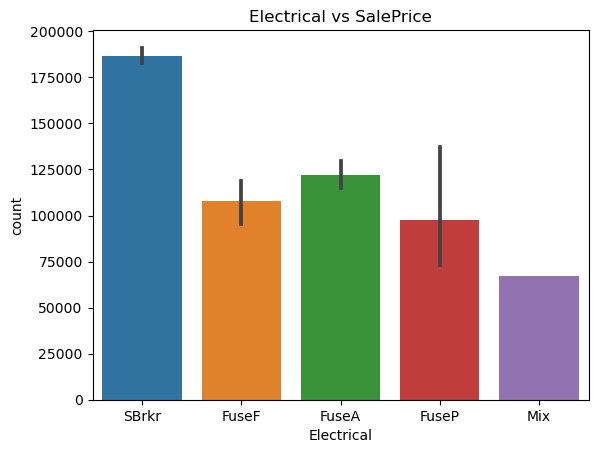

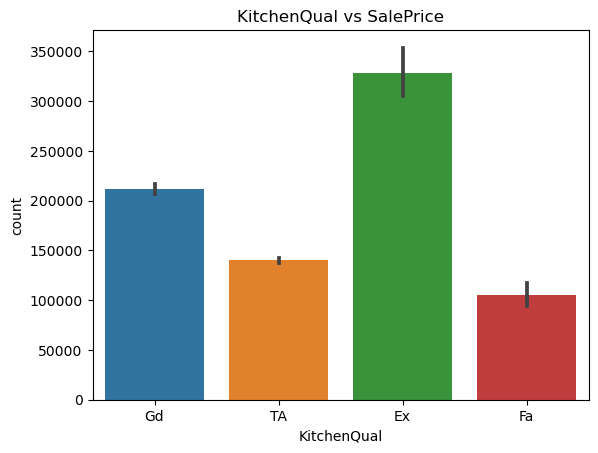

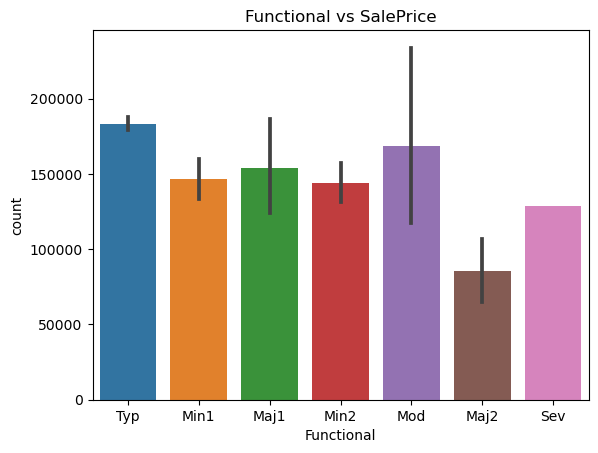

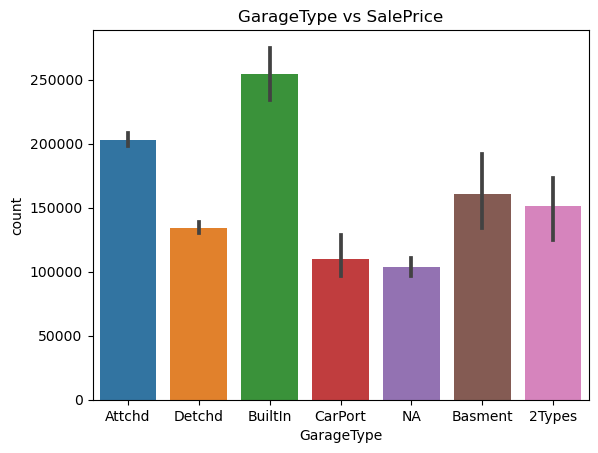

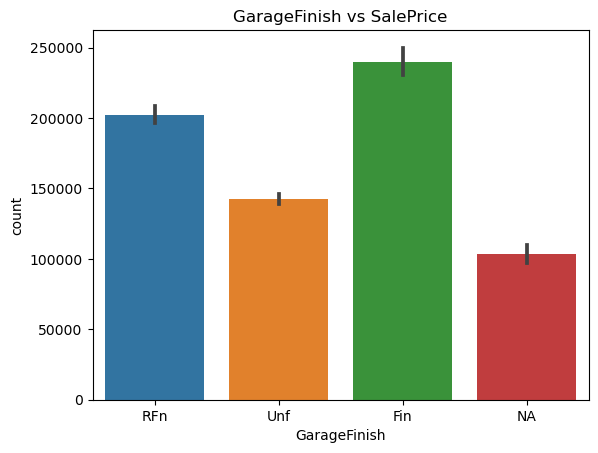

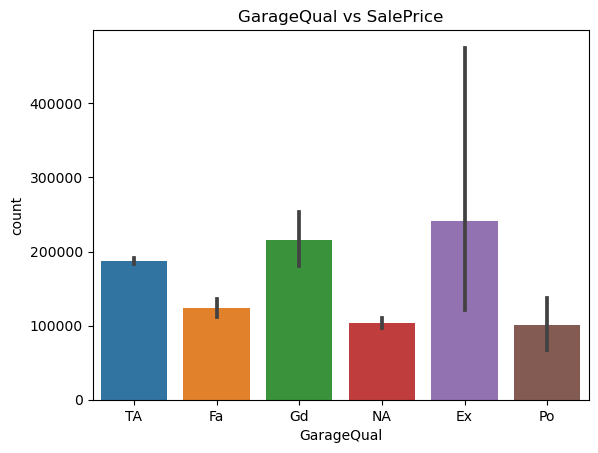

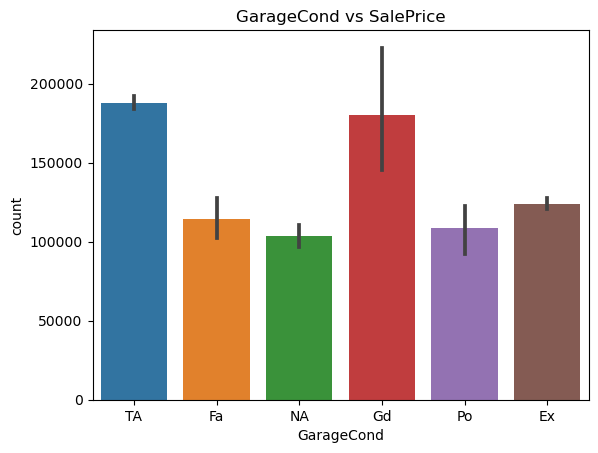

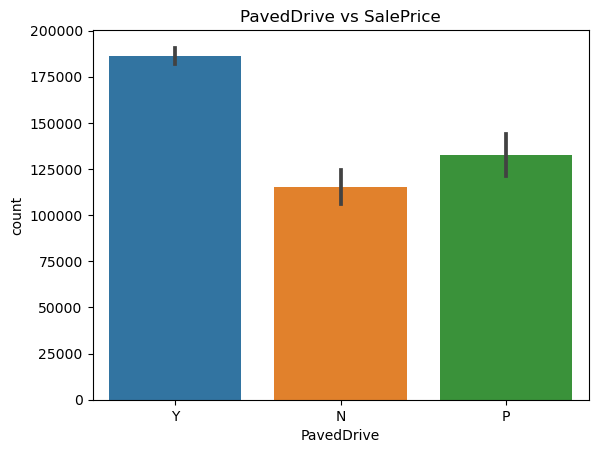

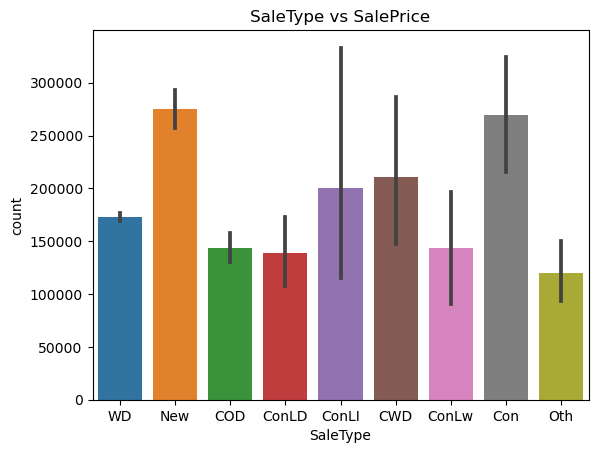

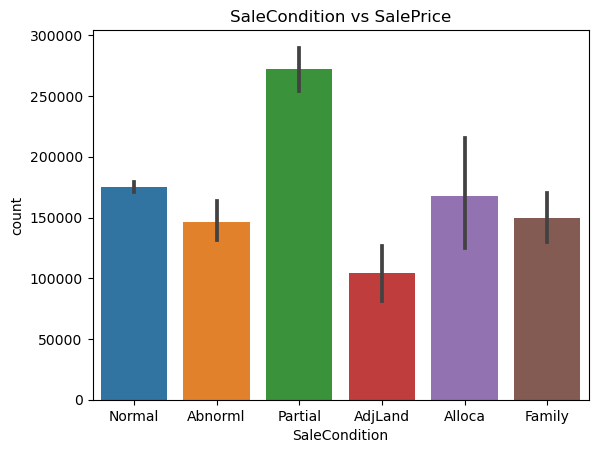

In [27]:
for feature in categorical_columns:
    if feature not in ["Neighborhood",'RoofMatl','Exterior1st','Exterior2nd']:
        fig = sns.barplot(data=df,x=feature,y="SalePrice")
        fig.set(xlabel=feature,ylabel='count')
        plt.title(feature + " vs " + 'SalePrice')
    else:
        fig = sns.barplot(data=df,y=feature,x="SalePrice")
        fig.set(ylabel=feature,xlabel='count')
        plt.title('SalePrice' + " vs " + feature)
    
    plt.show()

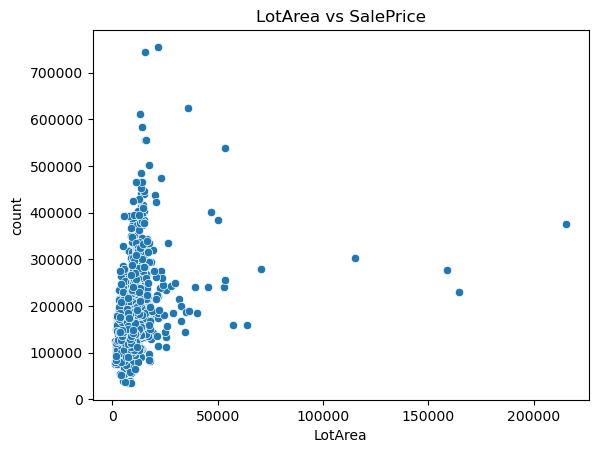

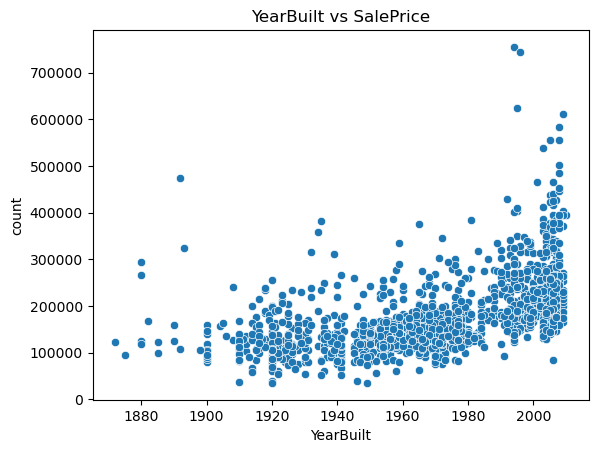

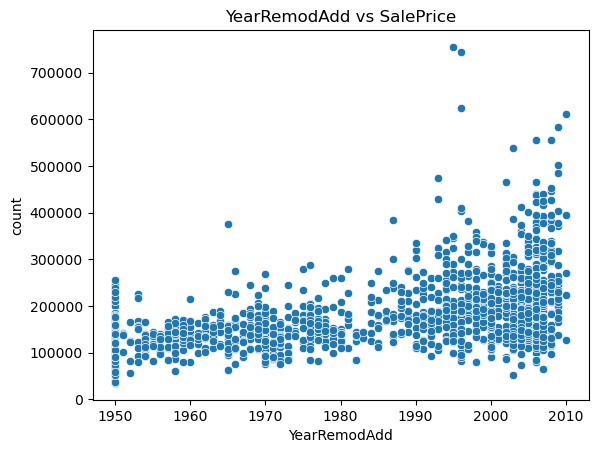

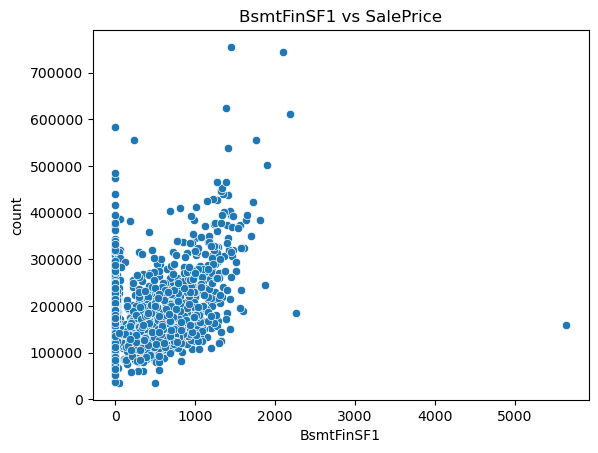

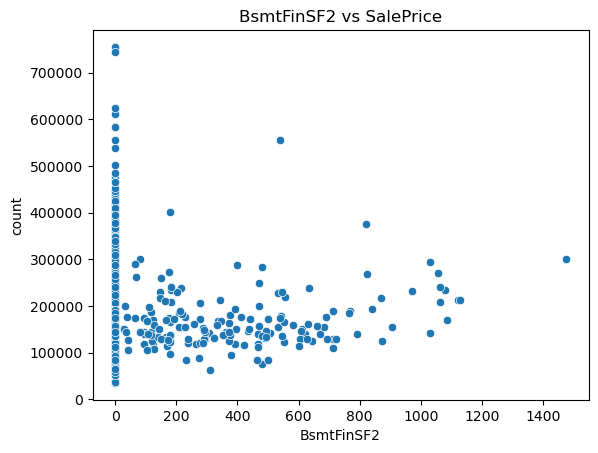

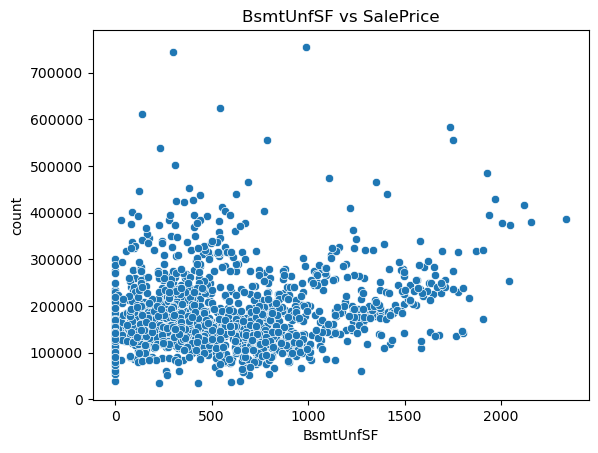

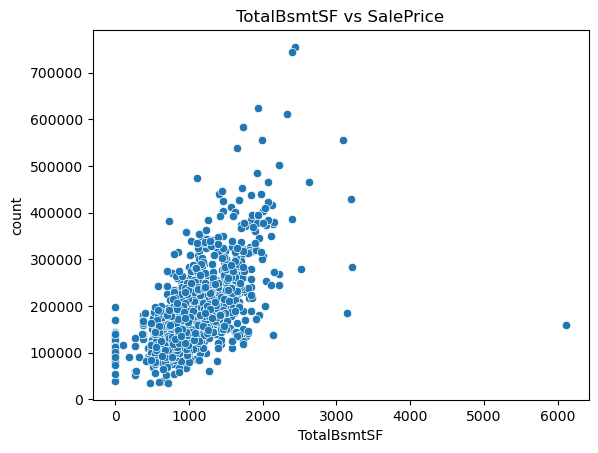

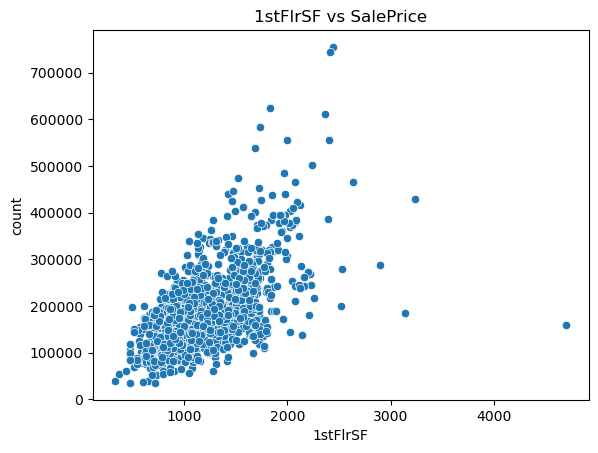

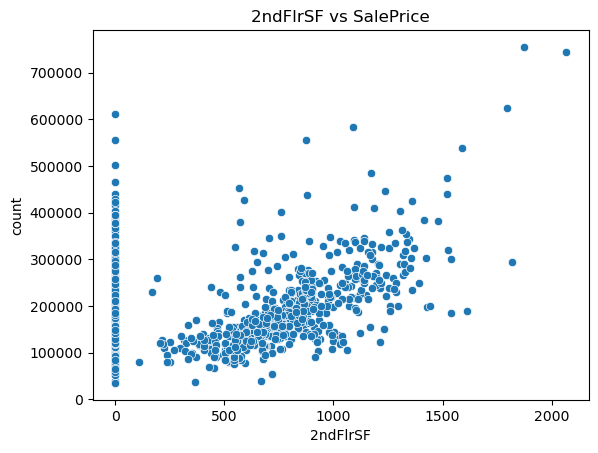

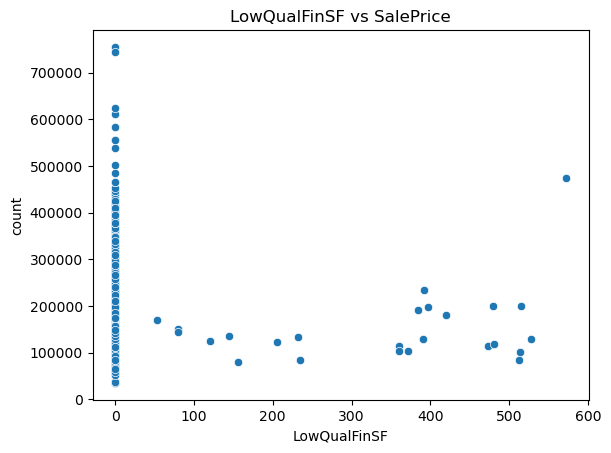

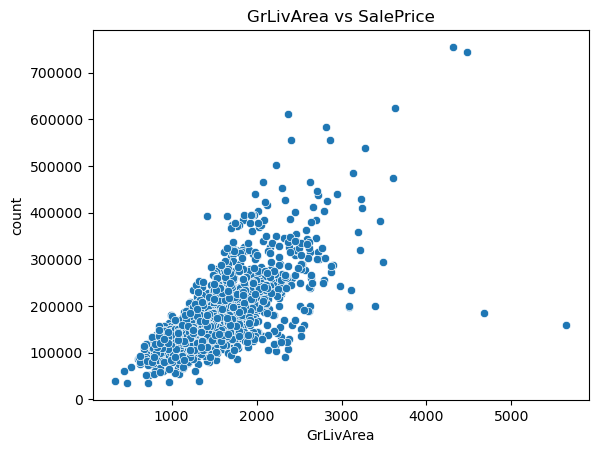

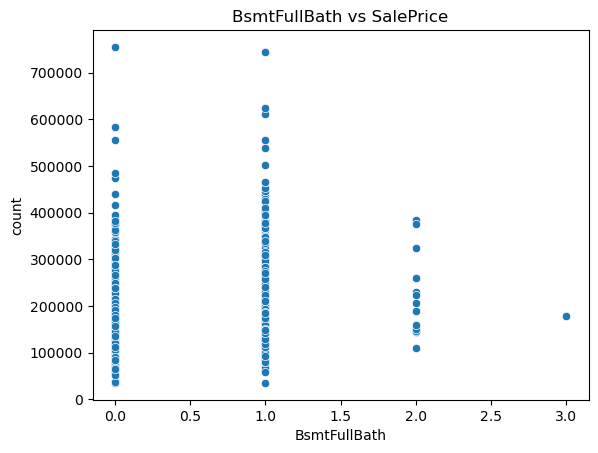

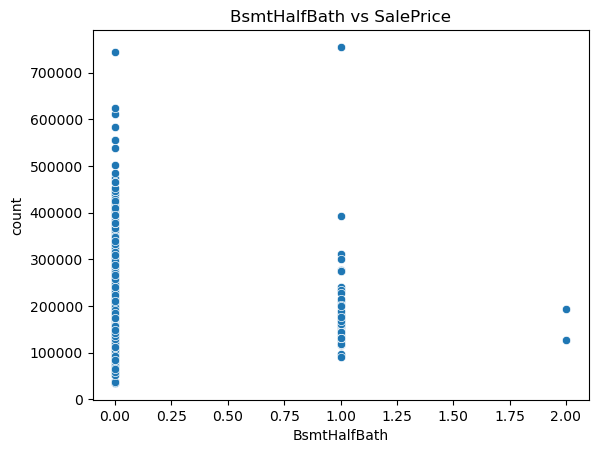

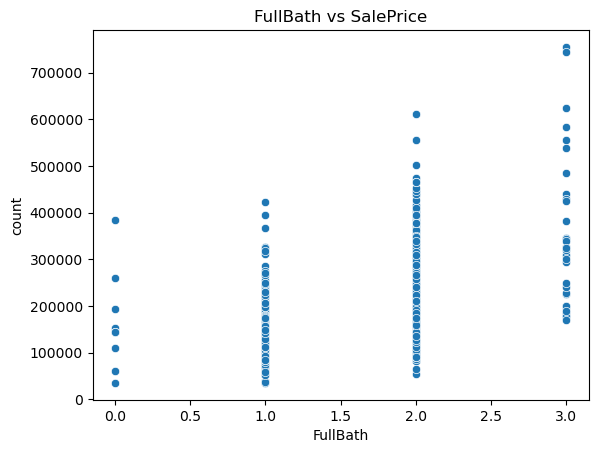

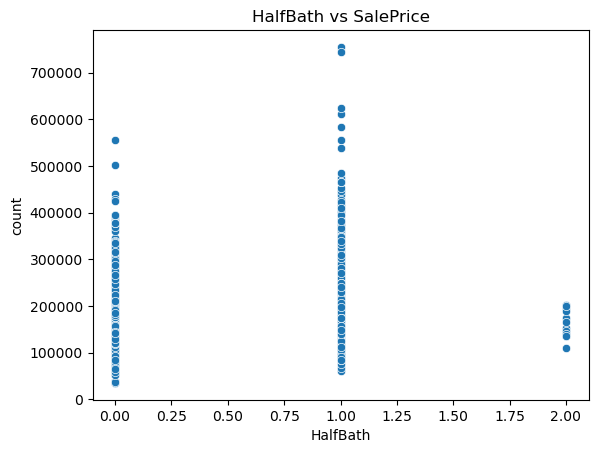

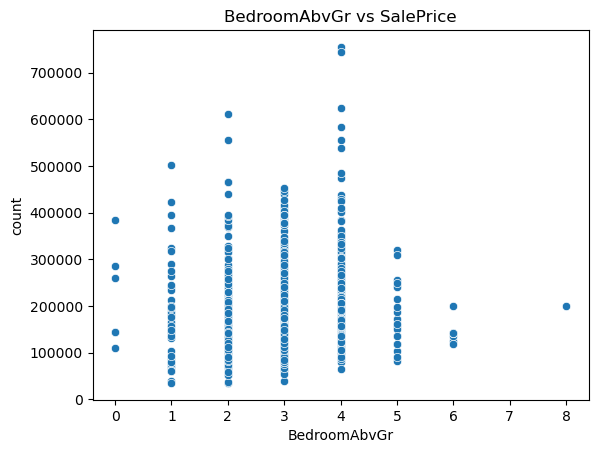

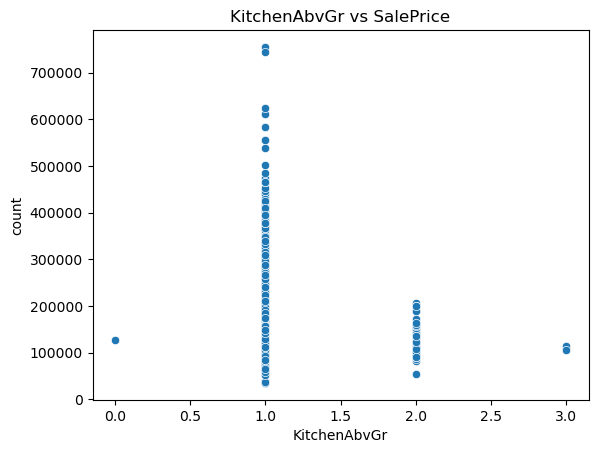

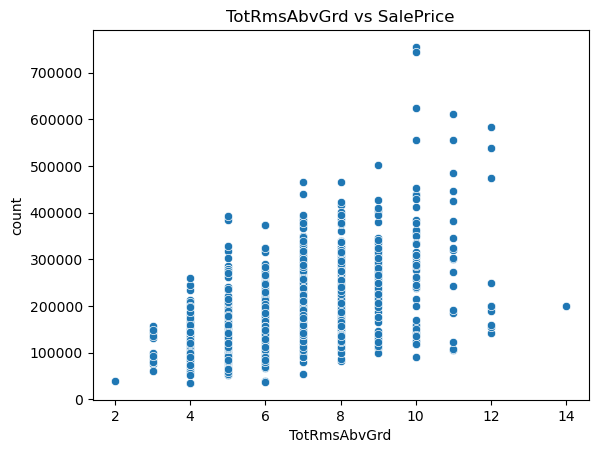

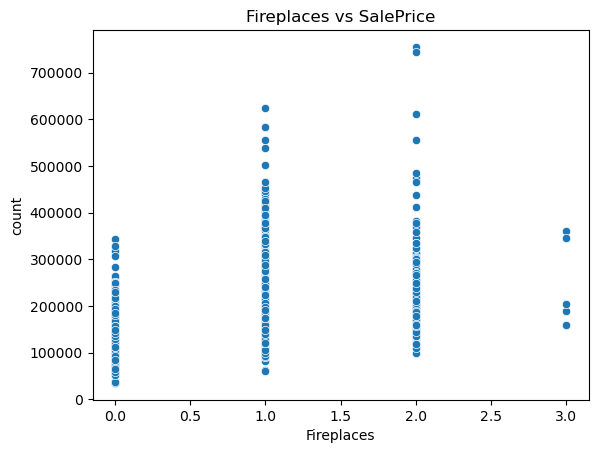

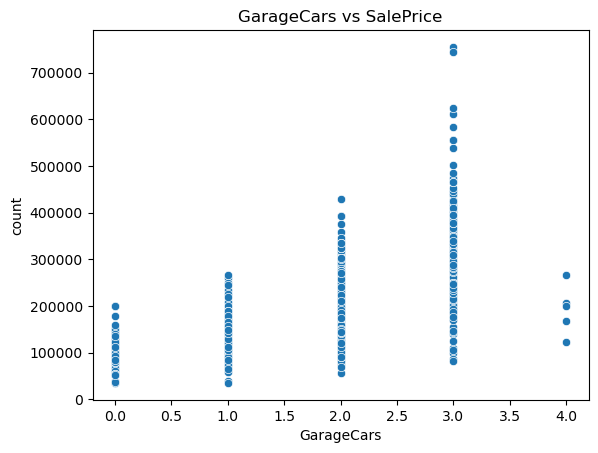

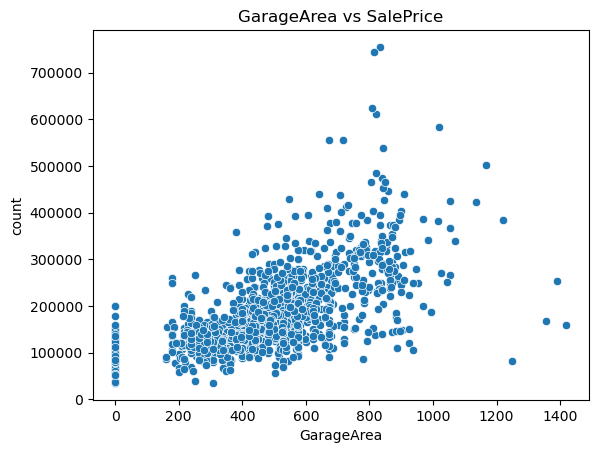

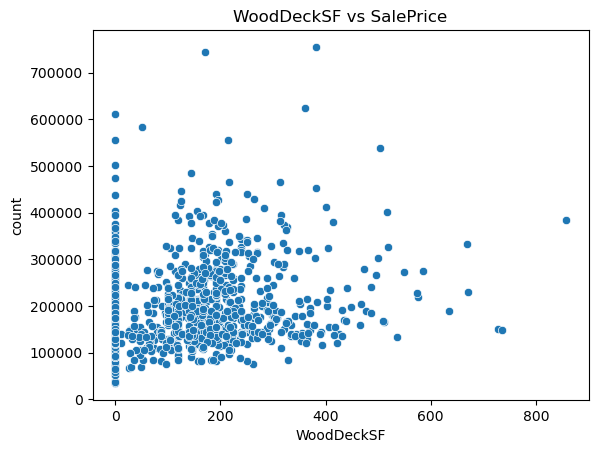

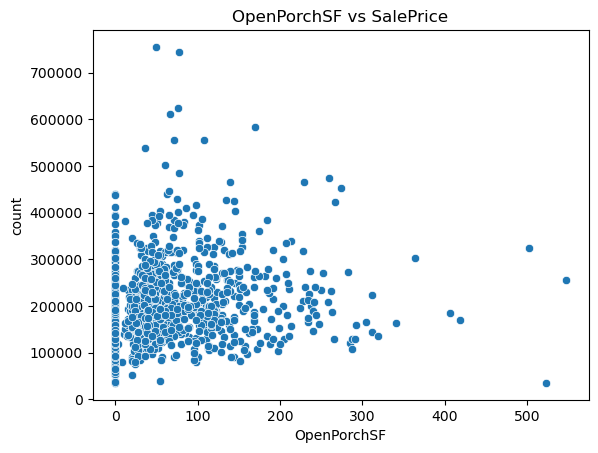

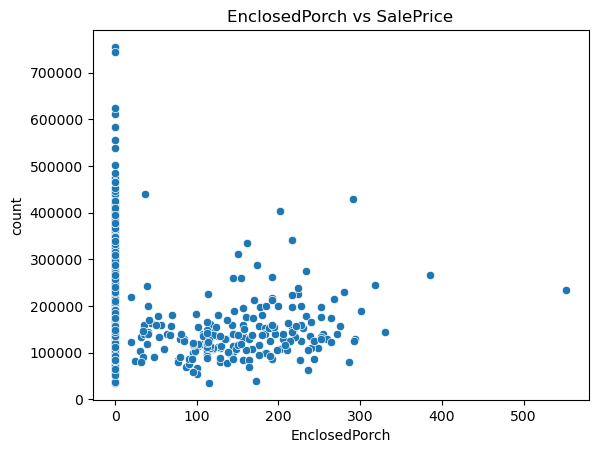

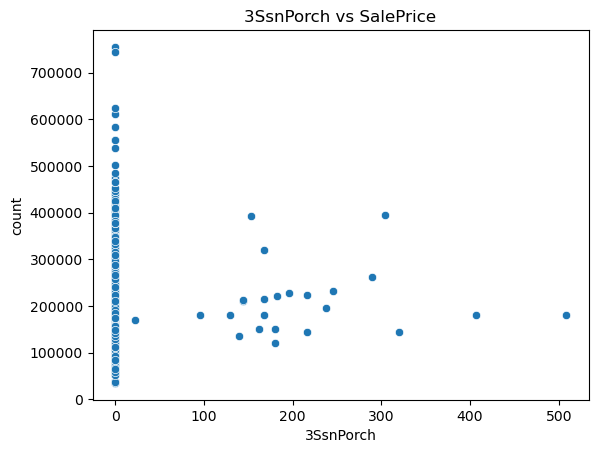

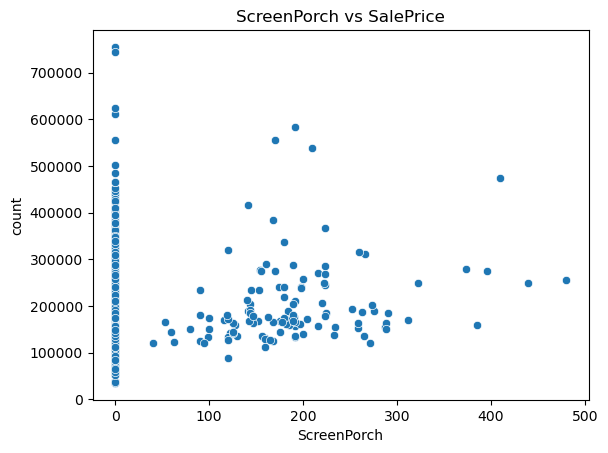

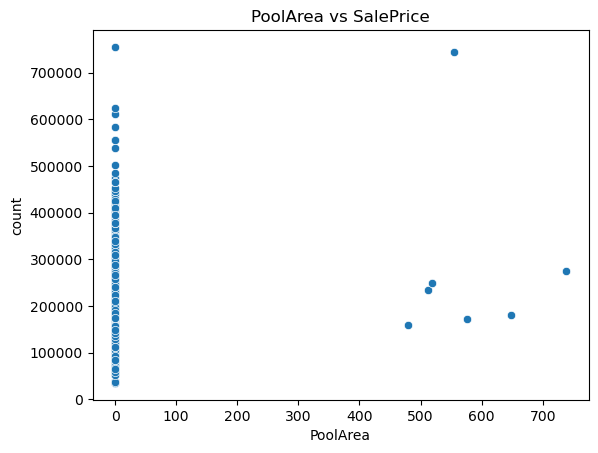

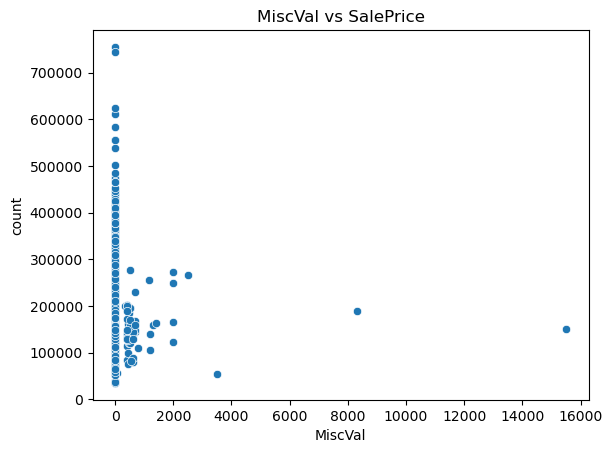

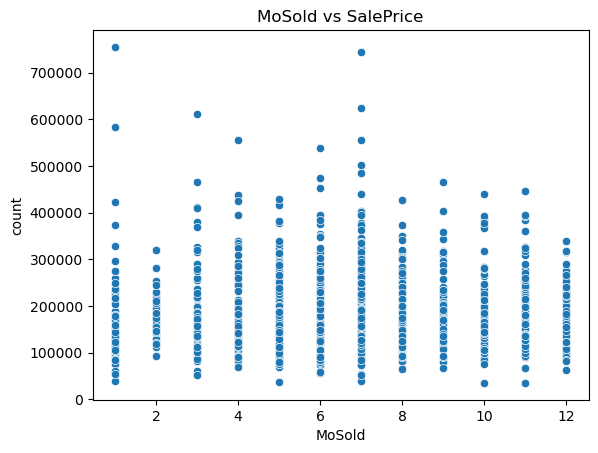

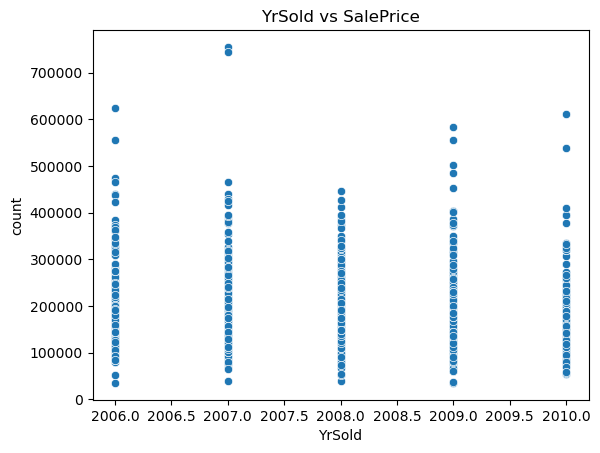

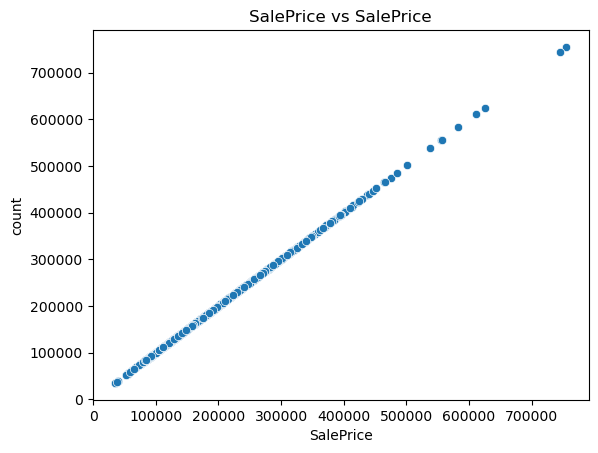

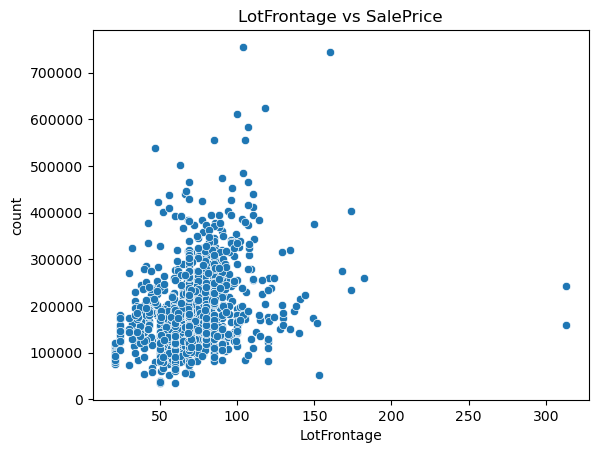

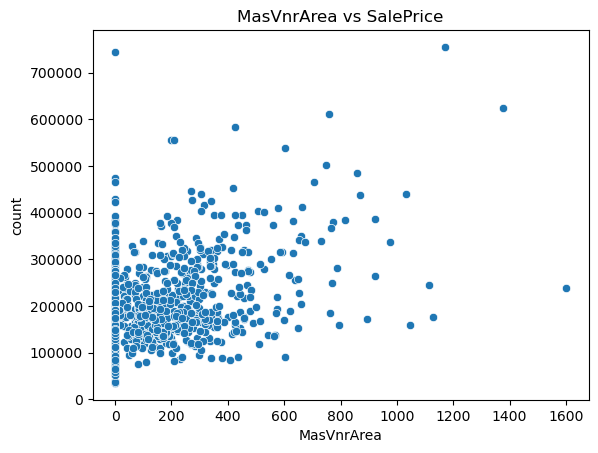

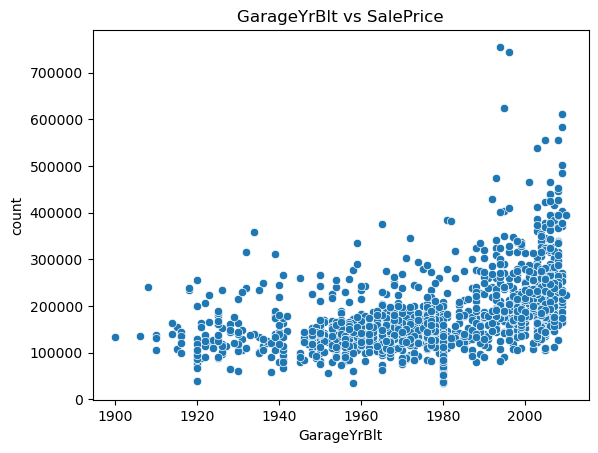

In [28]:
# scatter plots for numerical data
for feature in numerical_columns:
    fig = sns.scatterplot(data=df,x=feature,y="SalePrice")
    fig.set(xlabel=feature,ylabel='count')
    plt.title(feature + " vs " + 'SalePrice')
    plt.show()

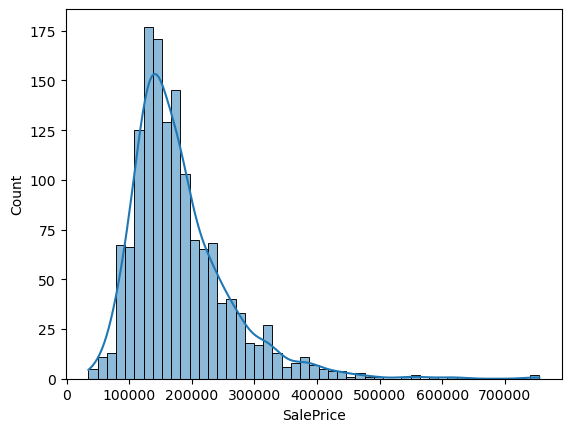

In [29]:
# checking for skewness in target variable SalePrice
sns.histplot(x=df['SalePrice'],kde=True)
plt.show()

```
SalePrice is right skewed
```

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

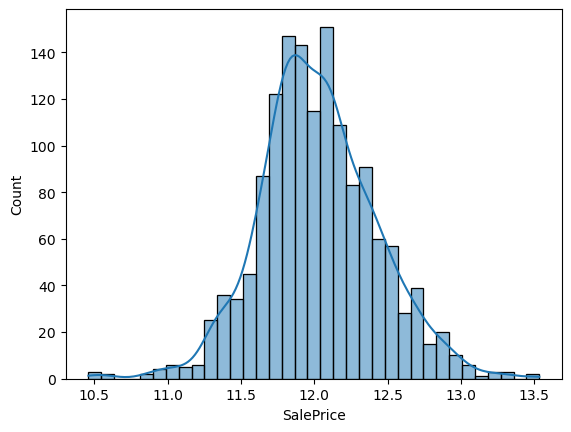

In [30]:
# checking if taking log can solve the problem
sns.histplot(x=np.log(df['SalePrice']),kde=True)

```
After taking log for SalePrice it becomes normally distributed.
```

In [31]:
# converting the SalePrice to log SalePrice
df['SalePrice'] = np.log(df['SalePrice'])

/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_76544/1156537641.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='jet')


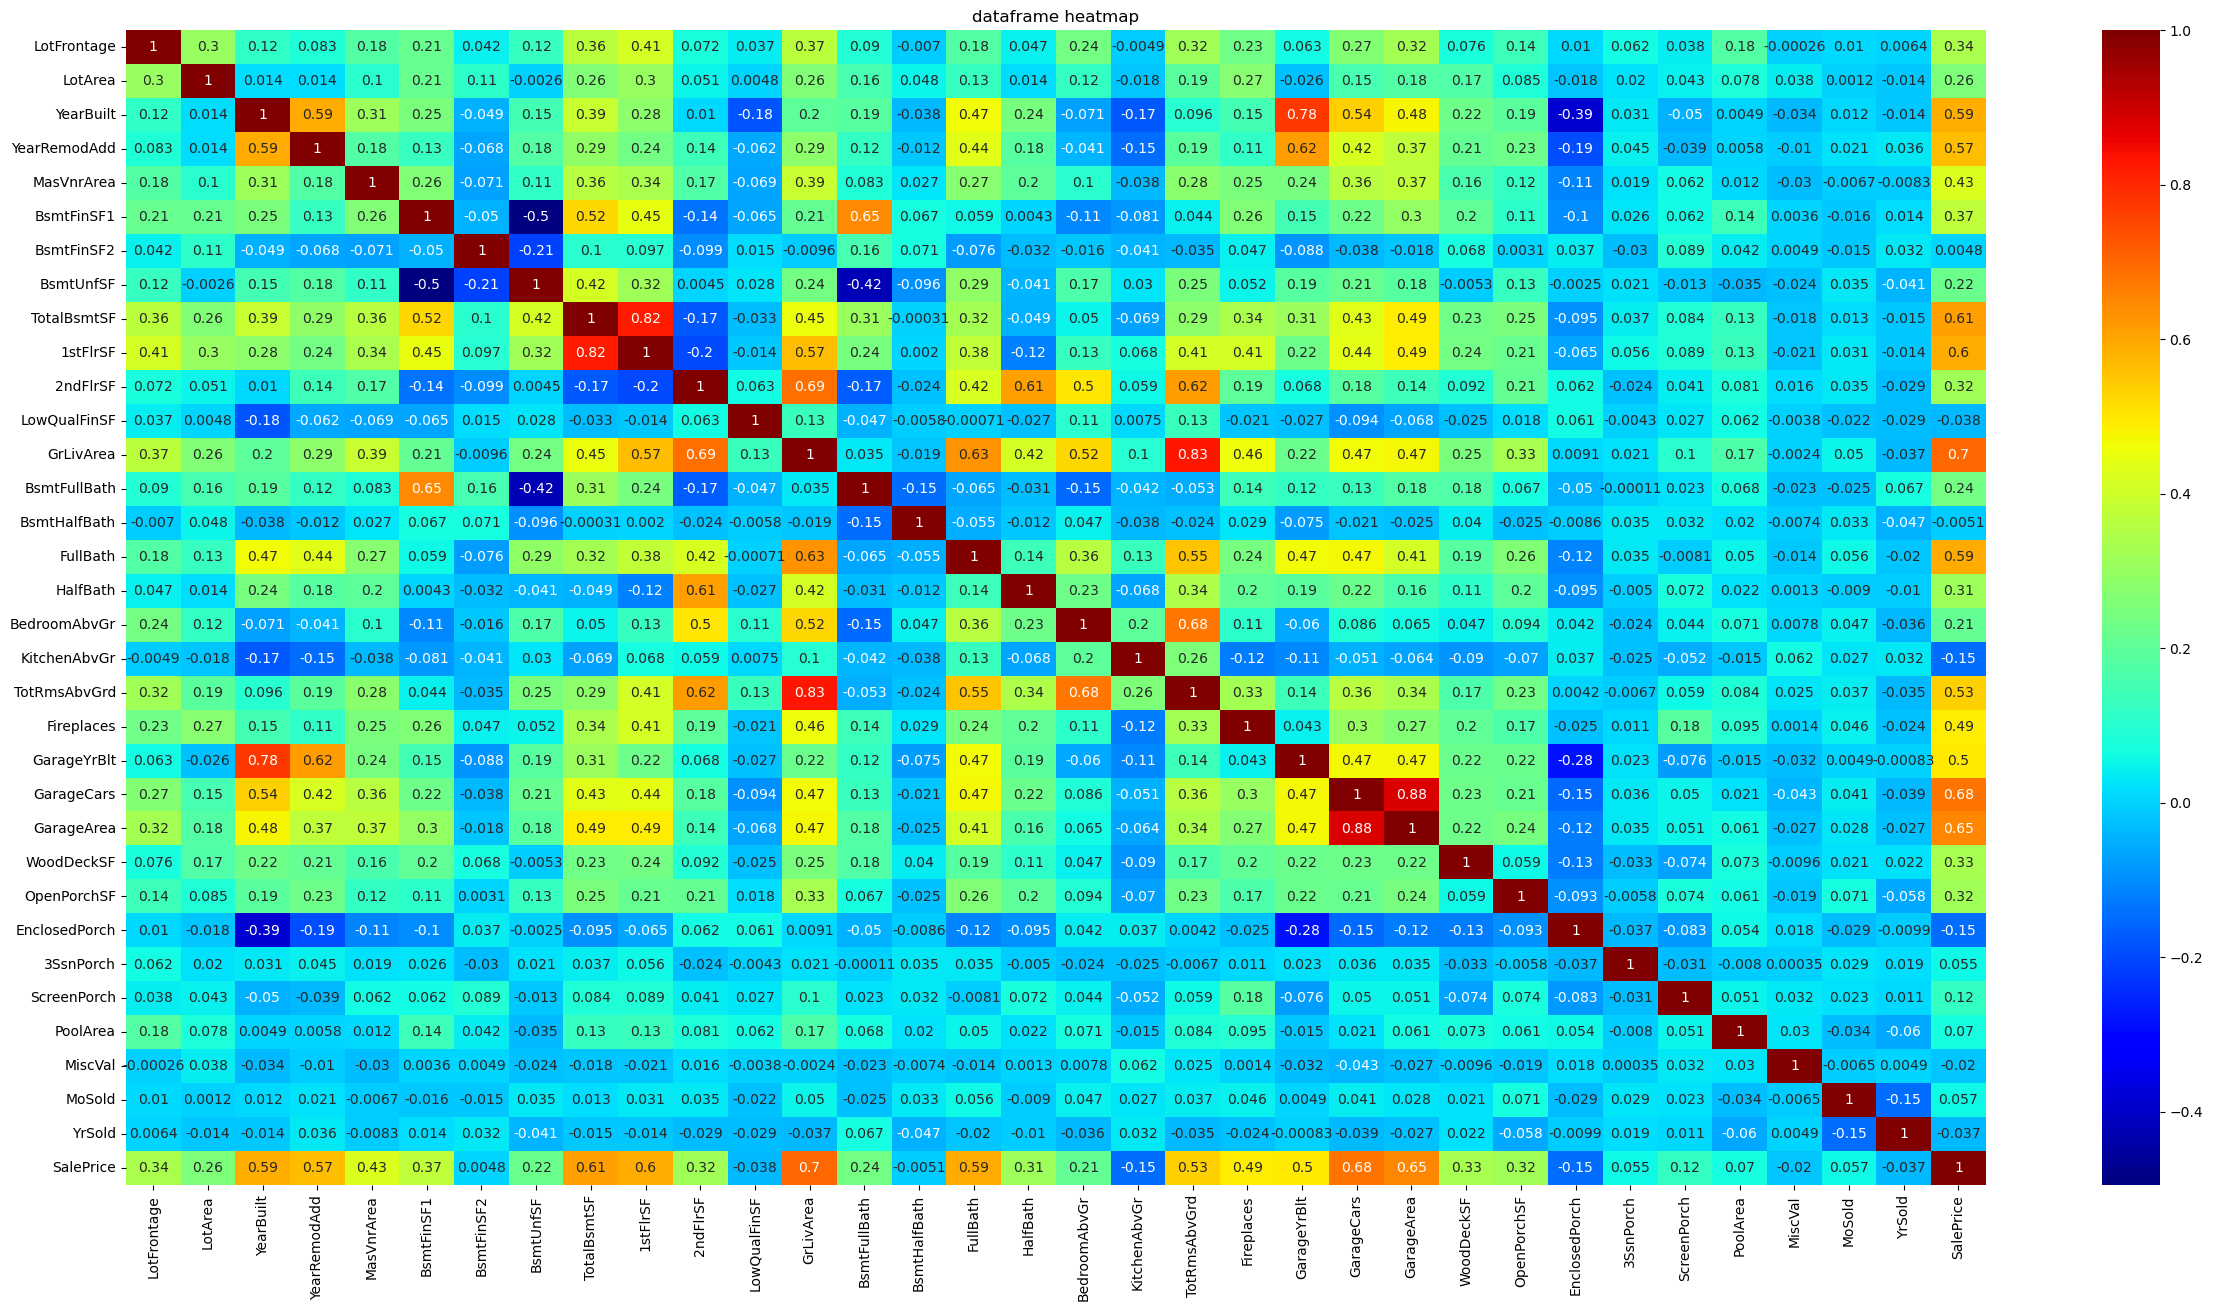

In [32]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='jet')
plt.title("dataframe heatmap")
plt.show()

#### Highly Correlated Columns
```
TotalBsmtSF with 1stFlrSF: 82%
GrLivArea with TotRmsAbvGrd: 83%
YearBuild with GarageYrBlt: 78%
GarageArea with GarageCars: 88%
```

In [33]:
# removing the highly correlated columns
highly_correlated_columns = ['1stFlrSF','TotRmsAbvGrd','GarageYrBlt','GarageCars']
df.drop(highly_correlated_columns,axis='columns',inplace=True)


# removing the highly correlated columns from numerical columns 
for feature in highly_correlated_columns:
    numerical_columns.remove(feature)

In [34]:
# Remodel or not 

df['Remodel'] = np.where(df['YearBuilt'] == df['YearRemodAdd'],0,1)

In [35]:
# creating dummy variables for categorical columns
dummy_vars = pd.get_dummies(df[categorical_columns],drop_first=True)

/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_76544/3058894656.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_vars = pd.get_dummies(df[categorical_columns],drop_first=True)


In [36]:
# checking how dummy variables looks
dummy_vars.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_

In [37]:
# concating the dummy vars with main dataframe
df = pd.concat([df,dummy_vars],axis=1)

In [38]:
# removing the categorical columns that are added as dummy vars
df.drop(categorical_columns,inplace=True,axis=1)

In [39]:
# checking how dataframe looks after dummy vars concat
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           0        150          856       854             0       1710   
1           0        284         1262         0             0       1262   
2           0        434          920       866             0       1786   
3           0        540          756       756             0       1717   
4           0        490         1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0         548           0           61              0          0   
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  Remodel  \
0            0         0        0       2    2008  12.247694        0   
1            0         0        0       5    2007  12.109011        0   
2            0         0        0       9    2008  12.317167        1   
3            0         0        0       2    2006  11.849398        1   
4            0         0        0      12    2008  12.429216        0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0           

## Model Building

In [40]:
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

In [41]:
# scaling the variables with standard scaler
numerical_columns.remove('SalePrice')
scaler = StandardScaler()

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])
df_train.describe()

LotFrontage       LotArea     YearBuilt  YearRemodAdd    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.043892e-17 -7.655211e-17  6.419938e-16 -8.420732e-16 -6.611318e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.199712e+00 -8.747892e-01 -3.277260e+00 -1.698692e+00 -5.580245e-01   
25%   -4.333861e-01 -2.951529e-01 -5.715419e-01 -8.732432e-01 -5.580245e-01   
50%   -2.577250e-02 -9.559968e-02  5.539286e-02  4.377630e-01 -5.580245e-01   
75%    3.818411e-01  9.919770e-02  9.463001e-01  9.233208e-01  2.857702e-01   
max    1.102509e+01  1.987332e+01  1.276266e+00  1.214656e+00  7.986733e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      2ndFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -6.437336e-17 -1.870307e-17 -1.304865e-17  1.879006e-16 -6.350345e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -9.640305e-01 -2.933126e-01 -1.256903e+00 -2.314361e+00 -7.892303e-01   
25%   -9.640305e-01 -2.933126e-01 -7.753184e-01 -5.862144e-01 -7.892303e-01   
50%   -1.208154e-01 -2.933126e-01 -2.268472e-01 -1.481848e-01 -7.892303e-01   
75%    5.675235e-01 -2.933126e-01  5.401208e-01  5.491756e-01  8.832346e-01   
max    1.117655e+01  8.338494e+00  3.951345e+00  1.100087e+01  3.954781e+00   

       LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.130883e-17 -5.915390e-17  4.871498e-17 -5.219462e-18  6.611318e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.245016e-01 -2.031927e+00 -8.374505e-01 -2.477915e-01 -2.840982e+00   
25%   -1.245016e-01 -7.207646e-01 -8.374505e-01 -2.477915e-01 -1.028080e+00   
50%   -1.245016e-01 -9.810360e-02 -8.374505e-01 -2.477915e-01  7.848212e-01   
75%   -1.245016e-01  4.812910e-01  1.066863e+00 -2.477915e-01  7.848212e-01   
max    1.056363e+01  7.757584e+00  4.875491e+00  8.047130e+00  2.597723e+00   

           HalfBath  BedroomAbvGr  KitchenAbvGr    Fireplaces    GarageArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   4.784507e-17 -3.479641e-18  3.862402e-16  9.395031e-17 -9.569013e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -7.533165e-01 -3.484694e+00 -2.341549e-01 -9.271528e-01 -2.225247e+00   
25%   -7.533165e-01 -1.044452e+00 -2.341549e-01 -9.271528e-01 -6.694436e-01   
50%   -7.533165e-01  1.756687e-01 -2.341549e-01  6.221483e-01  3.773952e-02   
75%    1.244440e+00  1.756687e-01 -2.341549e-01  6.221483e-01  4.903367e-01   
max    3.242196e+00  6.276274e+00  8.459379e+00  3.720751e+00  4.459992e+00   

         WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch  \
count  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03  1.021000e+03   
mean  -4.523534e-17 -7.133264e-17   5.306453e-17 -2.087785e-17 -3.479641e-18   
std    1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00  1.000490e+00   
min   -7.445984e-01 -7.108993e-01  -3.681207e-01 -1.219220e-01 -2.751255e-01   
25%   -7.445984e-01 -7.108993e-01  -3.681207e-01 -1.219220e-01 -2.751255e-01   
50%   -7.445984e-01 -3.179307e-01  -3.681207e-01 -1.219220e-01 -2.751255e-01   
75%    6.056873e-01  3.470932e-01  -3.681207e-01 -1.219220e-01 -2.751255e-01   
max    6.143466e+00  7.193816e+00   8.374816e+00  1.559696e+01  7.050058e+00   

          PoolArea       MiscVal        MoSold        YrSold    SalePrice  \
count  1021.000000  1.021000e+03  1.021000e+03  1.021000e+03  1021.000000   
mean      0.000000 -1.391856e-17  5.567426e-17  4.976583e-14    12.023180   
std       1.000490  1.000490e+00  1.000490e+00  1.000490e+00     0.396609   
min      -0.062302 -8.426338e-02 -1.925187e+00 -1.358737e+00    10.460242   
25%      -0.062302 -8.426338e-02 -8.331783e-01 -6.1168

In [42]:
# dividing the dataset into x and y
y_train = df_train.pop("SalePrice")
X_train = df_train
y_test = df_test.pop("SalePrice")
X_test = df_test

### Ridge Regression

In [43]:
# finding the best alpha value with grid search cv
params = {'alpha':[0.0001,0.001,0.01,0.1,0.05,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,10,15,20,25,50,100,1000]}

ridge = Ridge()
ridge_folds=5 
model_cv_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    cv=ridge_folds,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    verbose=1
)

model_cv_ridge.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.05, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10, 15, 20, 25, 50, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
# best alpha param
model_cv_ridge.best_params_

{'alpha': 10}

In [59]:
# fitting the ridge model with best alpha param
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [60]:
# predicting values with ridge algorithm
y_train_predict = ridge.predict(X_train)
y_test_predict = ridge.predict(X_test)

In [61]:
# r2 score for ridge model
print('ridge train r2 score' ,r2_score(y_train,y_train_predict))
print("ridge test r2 score", r2_score(y_test,y_test_predict))

ridge train r2 score 0.9215312014275399
ridge test r2 score 0.8756282964011604


#### R2 score for ridge

```
ridge train r2 score 0.921
ridge test r2 score 0.875
```

In [62]:
# showing all the coeficients
ridge_parameters = list(ridge.coef_)
ridge_parameters.insert(0,ridge.intercept_)
cols = df.columns
cols = cols.insert(0,'constant')
sorted(list(zip(ridge_parameters,cols)),key=lambda x:abs(x[0]),reverse=True)


[(11.685419010855943, 'constant'),
 (0.1304550668958623, 'OverallQual_8'),
 (0.11484503236467394, 'GrLivArea'),
 (-0.10277351723015743, 'OverallCond_2'),
 (-0.08725753176107841, 'Neighborhood_Crawfor'),
 (-0.08586980828260034, 'Condition2_PosA'),
 (0.08558730735687302, 'Neighborhood_CollgCr'),
 (0.08438193168144248, 'Neighborhood_NoRidge'),
 (-0.08299757697154345, 'Remodel'),
 (0.08052051044693267, 'OverallQual_7'),
 (-0.07711638091912786, 'HouseStyle_SLvl'),
 (-0.0720266256825604, 'BldgType_Duplex'),
 (0.07089503992908786, 'HeatingQC_TA'),
 (-0.06931642186730547, 'Neighborhood_IDOTRR'),
 (0.06791985623329357, 'Neighborhood_SawyerW'),
 (0.06760355222928187, 'MSZoning_RH'),
 (-0.06651644565311095, 'Neighborhood_Gilbert'),
 (-0.06519908722266599, 'MSSubClass_120'),
 (-0.06406764032979552, 'OverallQual_3'),
 (0.0631209947716278, 'Exterior1st_BrkComm'),
 (0.06051404121658427, 'Neighborhood_Somerst'),
 (0.058083467464170174, 'OverallCond_8'),
 (0.05634087162128862, 'Neighborhood_NWAmes'),
 

## Lasso Regression

In [49]:
# finding the best alpha value with grid search cv
params = {'alpha':[0,0.0001,0.0005,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
lasso = Lasso()

model_cv_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    verbose=1
)
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/pulkitgangwar/miniconda/envs/data-science/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/pulkitgangwar/miniconda/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pulkitgangwar/miniconda/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e+00, tolerance: 1.305e-02 Linear regression models with null weight for the l1 regularization term are more efficien

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.0001, 0.0005, 0.005, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
# checking the best alpha value
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [51]:
# creating lasso model with best alpha value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [52]:
# predicting values with lasso model
y_train_lasso_predict = lasso.predict(X_train)
y_test_lasso_predict = lasso.predict(X_test)

In [53]:
# r2 score for lasso model
print('lasso train r2 score', r2_score(y_train,y_train_lasso_predict))
print('lasso test r2 score', r2_score(y_test,y_test_lasso_predict))

lasso train r2 score 0.94972272877158
lasso test r2 score 0.8710168205033497


#### r2 score for lasso model
```
lasso train r2 score 0.94972272877158
lasso test r2 score 0.8710168205033497
```

In [54]:
# printing all the coeficents 
lasso_parameters = list(lasso.coef_)
lasso_parameters.insert(0,lasso.intercept_)
lasso_cols = df.columns
lasso_cols = lasso_cols.insert(0,'constant')
sorted(list(zip(lasso_parameters,lasso_cols)),key=lambda x:abs(x[0]),reverse=True)

[(10.417142533912555, 'constant'),
 (-1.21672293861256, 'Condition2_PosA'),
 (1.1737603421518104, 'RoofMatl_WdShake'),
 (1.0994229978877128, 'RoofStyle_Shed'),
 (1.0485439810798995, 'RoofMatl_Metal'),
 (1.0240150758265538, 'RoofMatl_Roll'),
 (1.017432761042271, 'RoofMatl_Tar&Grv'),
 (1.0009832043114186, 'RoofMatl_CompShg'),
 (0.9549705261945106, 'RoofMatl_Membran'),
 (-0.3251524402483439, 'HouseStyle_SLvl'),
 (0.32284128714052013, 'MSSubClass_190'),
 (0.3196482421335463, 'MSZoning_RH'),
 (0.3132425196352219, 'MSZoning_FV'),
 (0.2716107230274568, 'MSZoning_RL'),
 (-0.20203386819069197, 'Functional_Mod'),
 (0.19632717209014622, 'OverallQual_8'),
 (0.17784631728283656, 'SaleType_Con'),
 (-0.16209075133035614, 'OverallCond_2'),
 (-0.16085057552809584, 'Neighborhood_IDOTRR'),
 (0.1362177555973689, 'OverallQual_9'),
 (0.13477212571967084, 'GrLivArea'),
 (-0.13412116025168616, 'Exterior1st_AsphShn'),
 (0.12426214068903264, 'Neighborhood_CollgCr'),
 (0.10784027768312593, 'OverallQual_7'),
 (0.

### Regression Analysis

Text(0.5, 1.0, 'Ridge Regression Analysis')

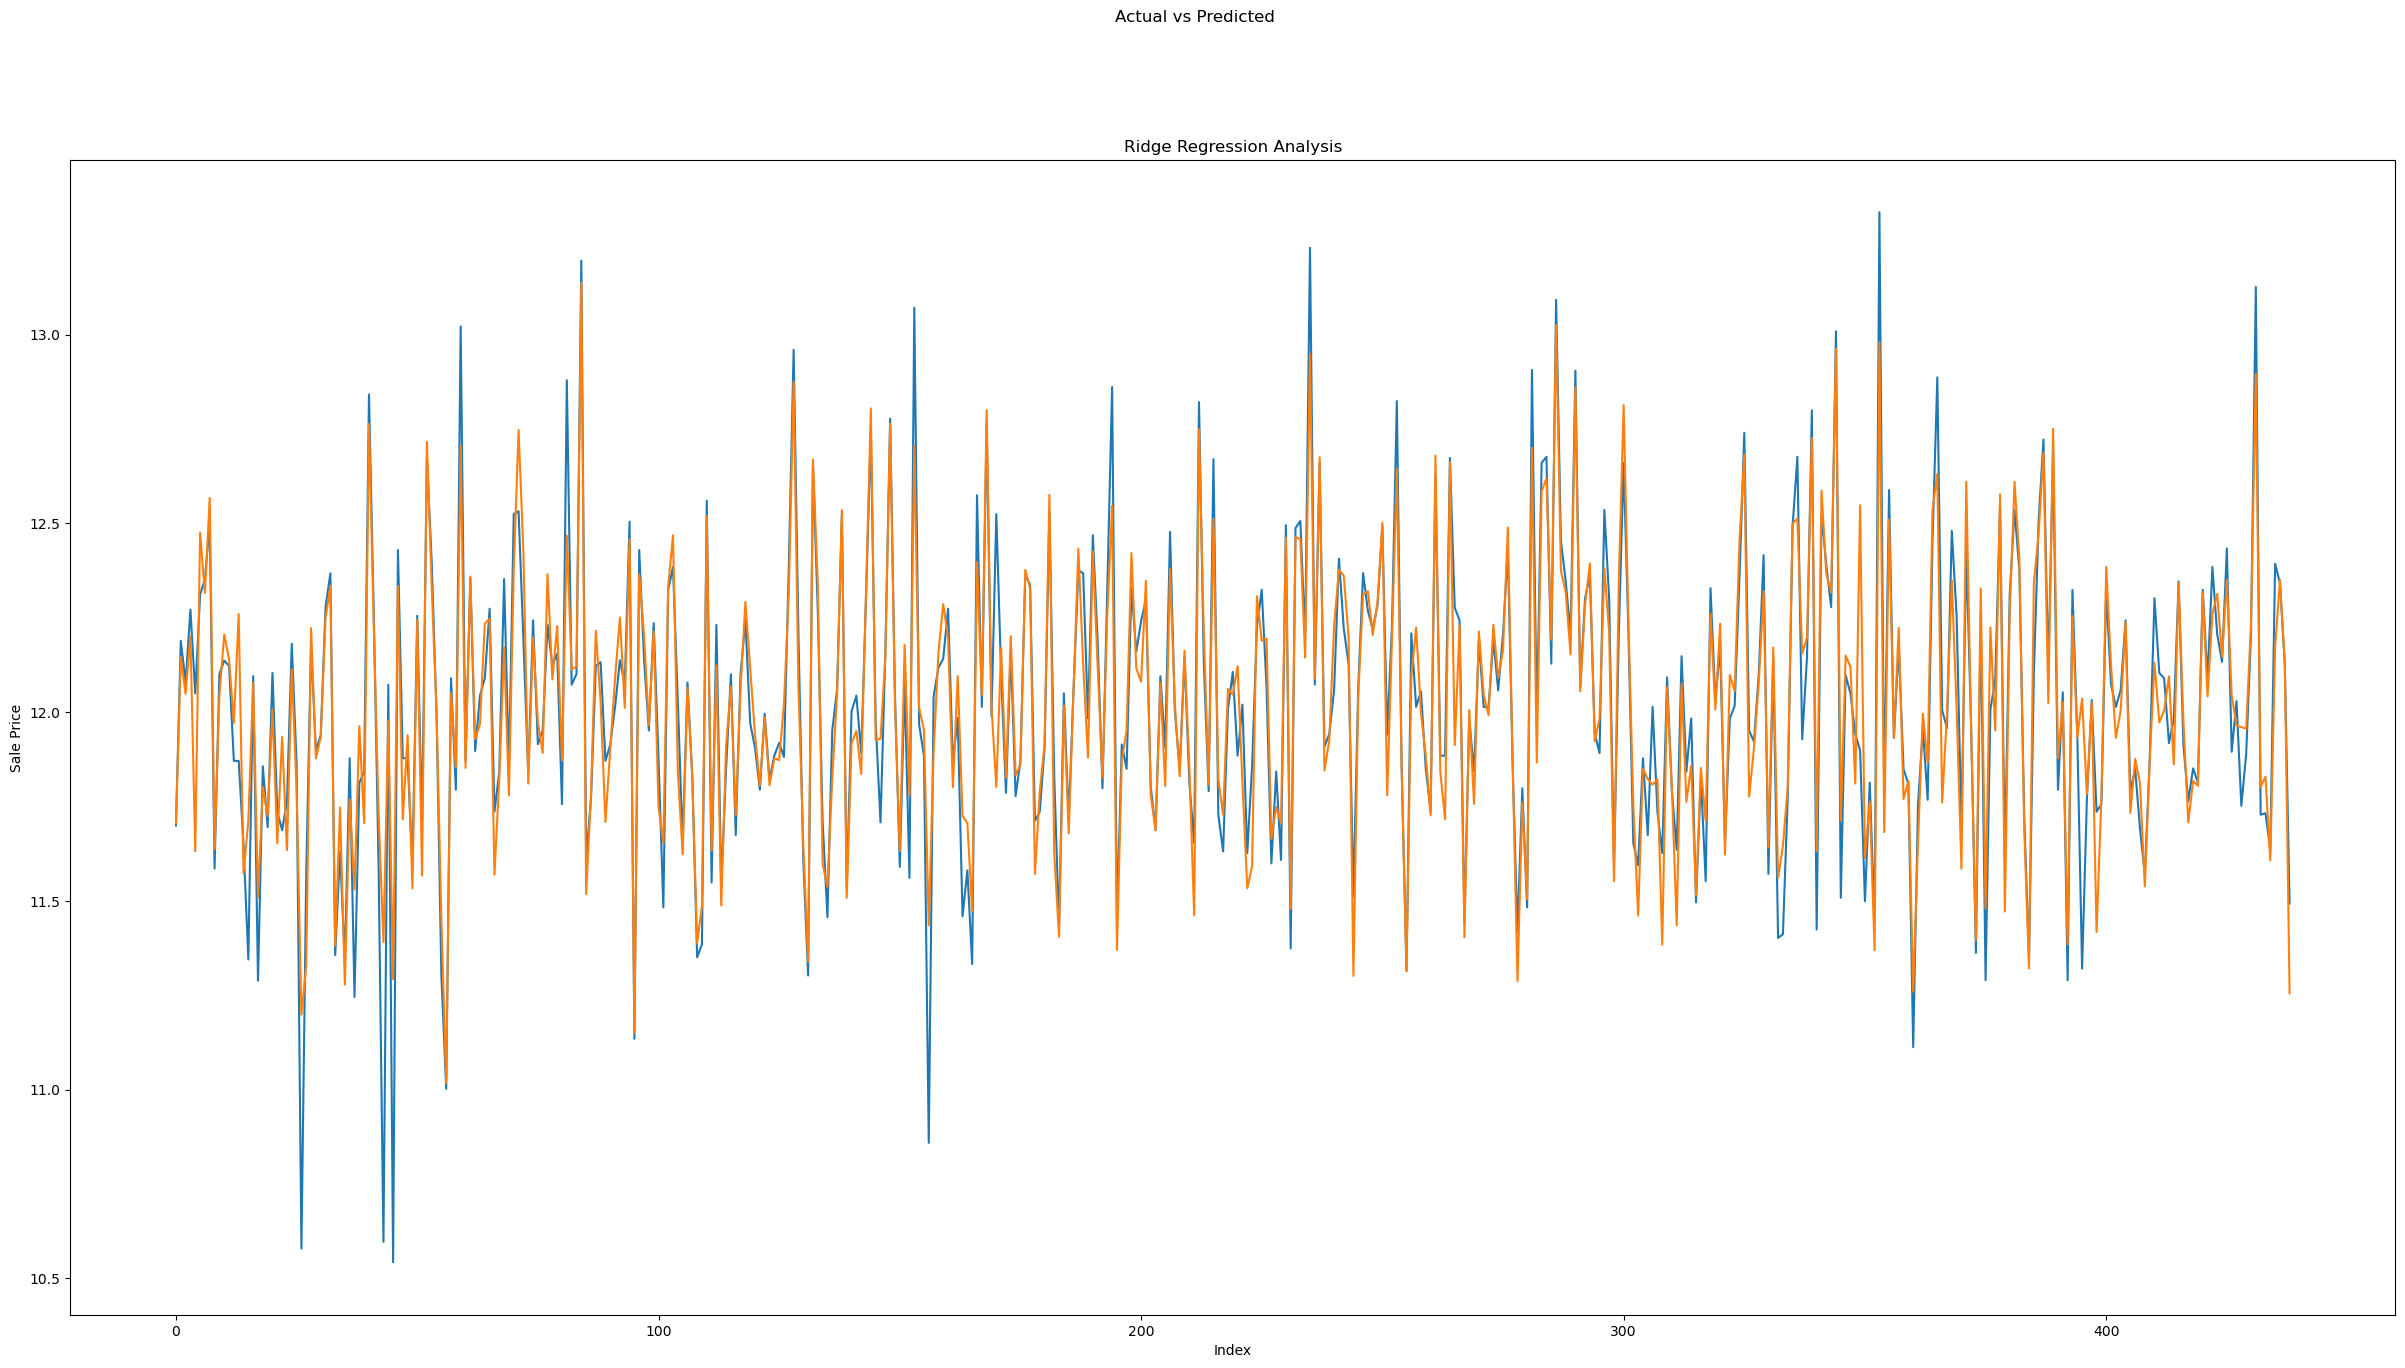

In [70]:
# ridge regression analysis

nums = [n for n in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(30,15))
plt.plot(nums,y_test)
plt.plot(nums,y_test_predict)
fig.suptitle("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.title("Ridge Regression Analysis")

Text(0.5, 1.0, 'Lasso Regression Analysis')

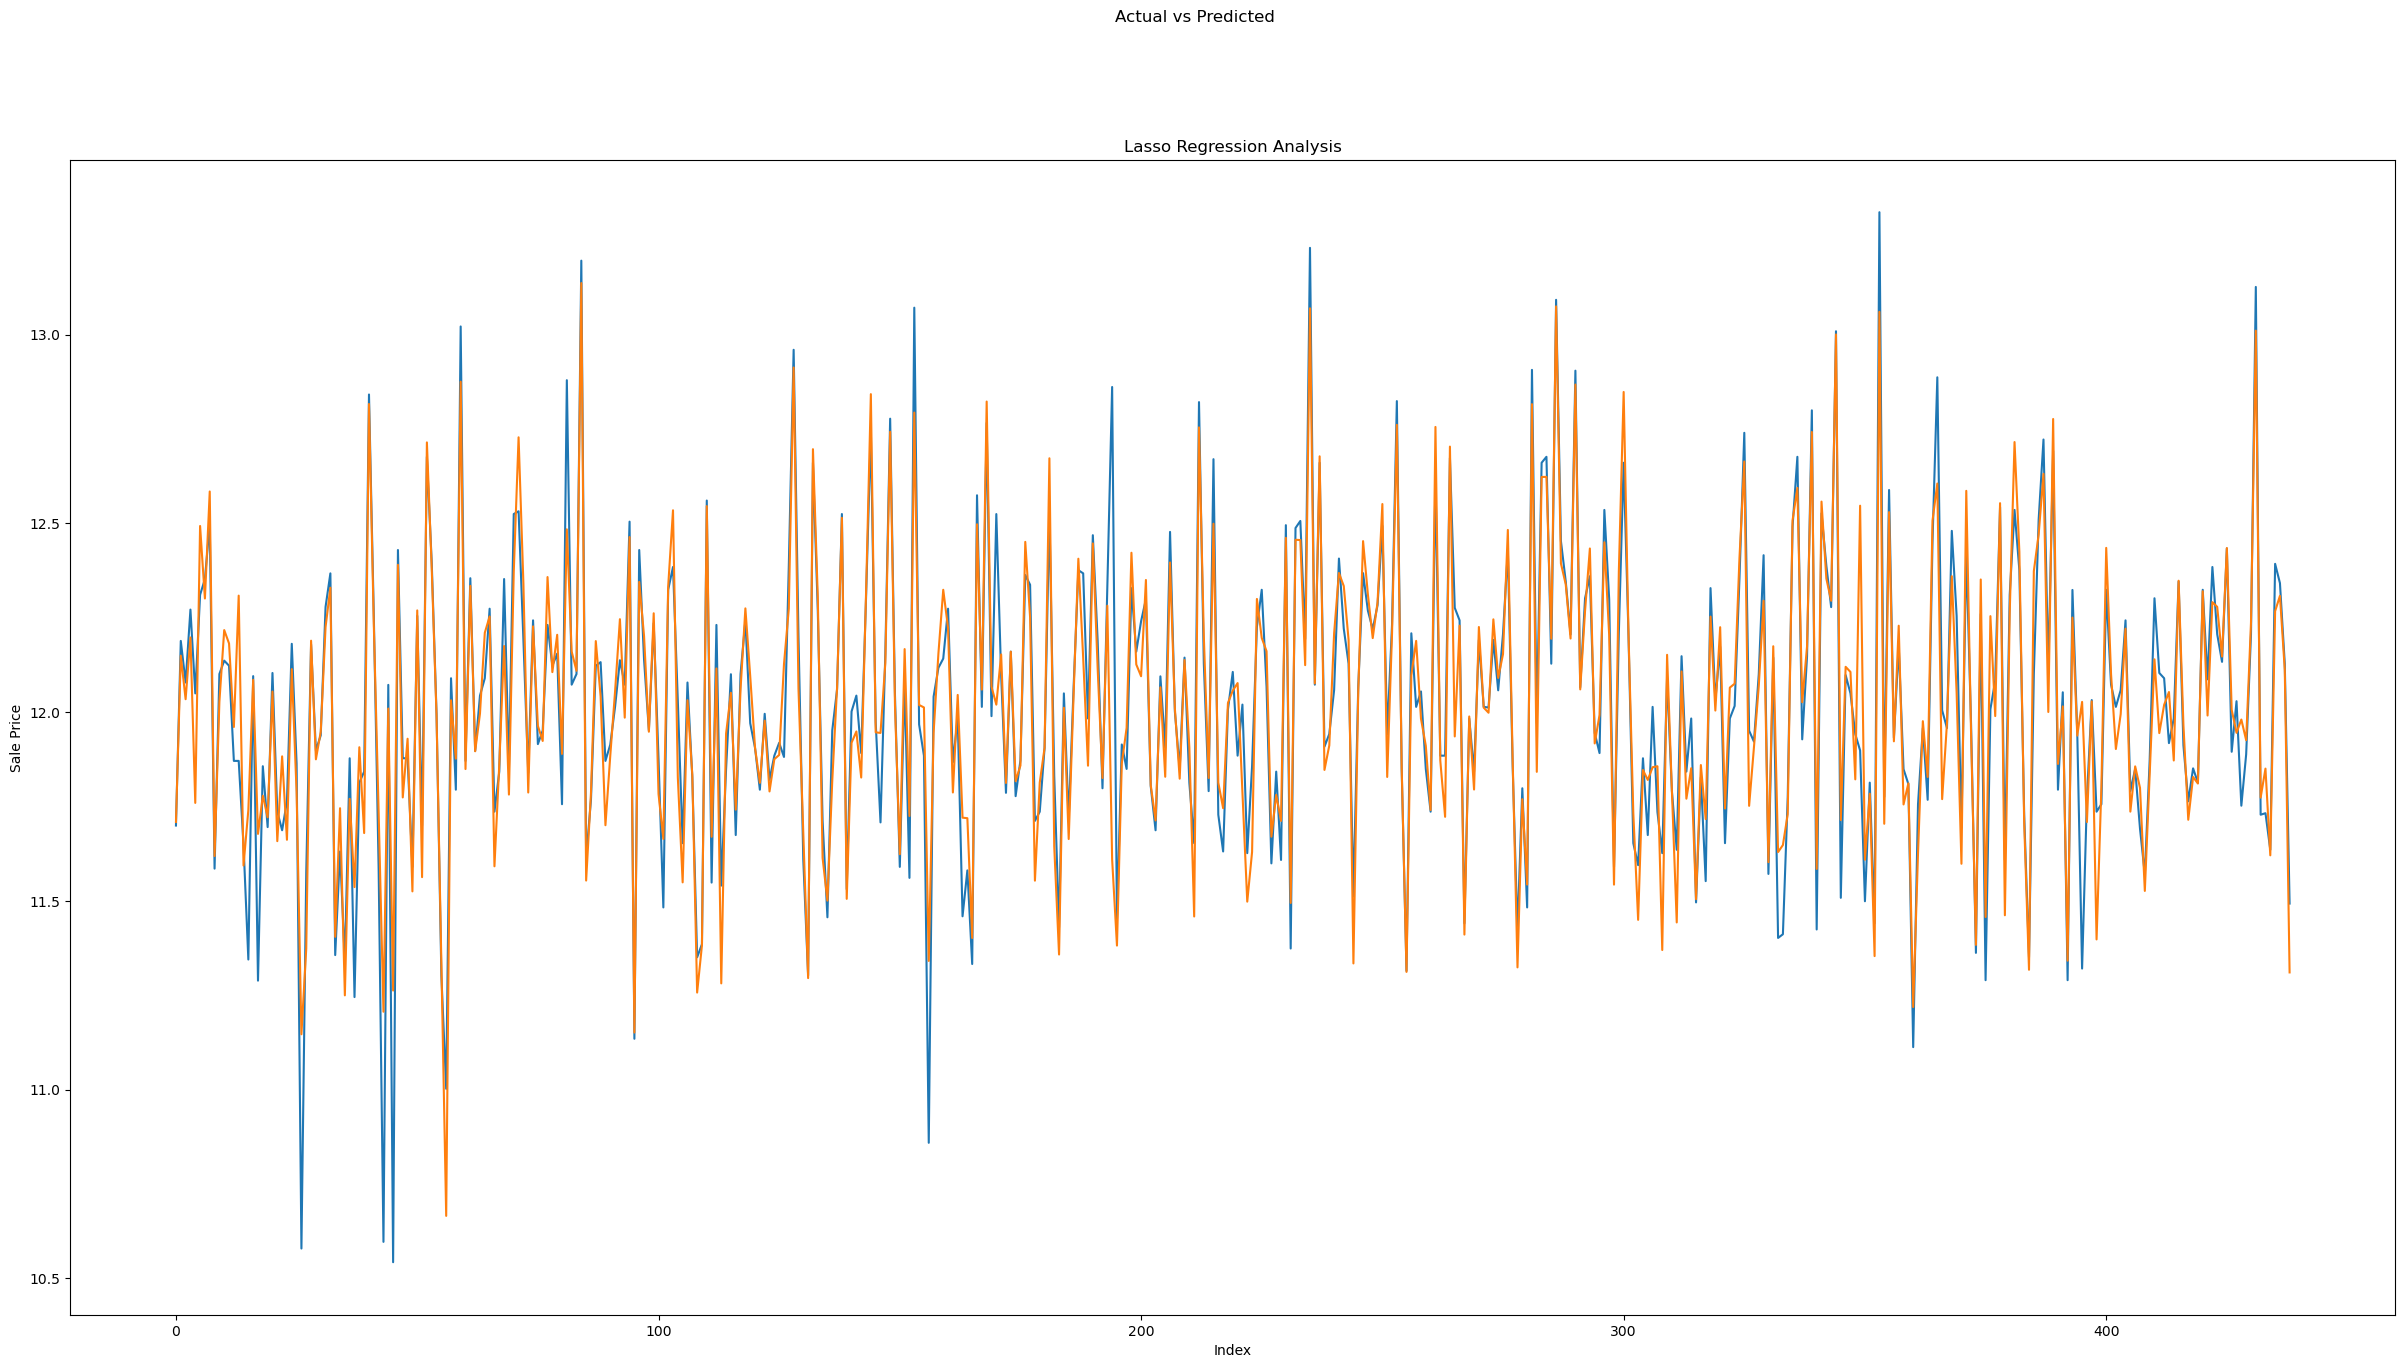

In [69]:
# Lasso regression analysis
nums = [n for n in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(30,15))
plt.plot(nums,y_test)
plt.plot(nums,y_test_lasso_predict)
fig.suptitle("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.title("Lasso Regression Analysis")

## Conclusion :
- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :92.1 Test :87.5
- Lasso : Train :94.9 Test :87.1

### Top 5 most significant variables in Ridge are:

- ('OverallQual_8',0.130),
- ('GrLivArea',0.114),
- ('OverallCond_2',-0.102),
- ('Neighborhood_Crawfor',-0.087),
- ('Condition2_PosA',-0.085),


### Top 5 most significant variables in Lasso are:
- ('Condition2_PosA',-1.216),
- ('RoofMatl_WdShake',1.173),
- ('RoofMatl_Metal',1.099),
- ('RoofStyle_Shed',1.04),
- ('RoofMatl_Roll',1.024),


### Optimal Values

- Optimal Value of alpha for ridge : 10
- Optimal Value of alpha for Lasso : 0.0001
- Because of Feature selection as well we can choose Lasso regression in this case.